In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
#THE DESCRIPTION OF EACH ATTRIBUTE:-
'''SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale'''

"SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\nMSSubClass: The building class\nMSZoning: The general zoning classification\nLotFrontage: Linear feet of street connected to property\nLotArea: Lot size in square feet\nStreet: Type of road access\nAlley: Type of alley access\nLotShape: General shape of property\nLandContour: Flatness of the property\nUtilities: Type of utilities available\nLotConfig: Lot configuration\nLandSlope: Slope of property\nNeighborhood: Physical locations within Ames city limits\nCondition1: Proximity to main road or railroad\nCondition2: Proximity to main road or railroad (if a second is present)\nBldgType: Type of dwelling\nHouseStyle: Style of dwelling\nOverallQual: Overall material and finish quality\nOverallCond: Overall condition rating\nYearBuilt: Original construction date\nYearRemodAdd: Remodel date\nRoofStyle: Type of roof\nRoofMatl: Roof material\nExterior1st: Exterior covering on house\nE

In [ ]:
data=pd.read_csv("train.csv")
hd=data.columns.tolist()[1::]
print(hd)
print(data.shape)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [ ]:
#TO PRINT THE TITLE ONLY WITH NULL VALUES ALONG WITH THE NUMBER OF NULL VALUES
null_title=data.isnull().sum()
print("THE TITLES WITH NULL VALUES:-\n",null_title[null_title>=1])

THE TITLES WITH NULL VALUES:-
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


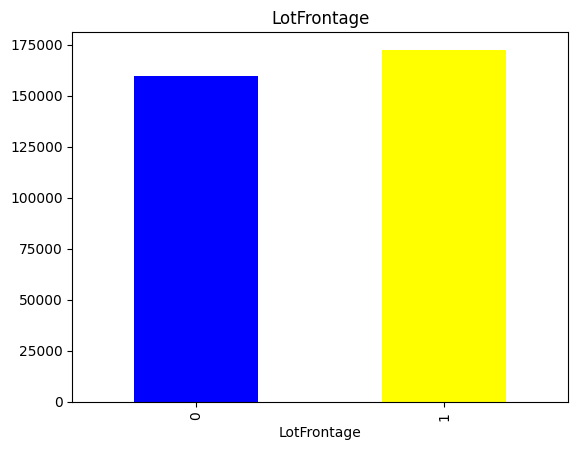

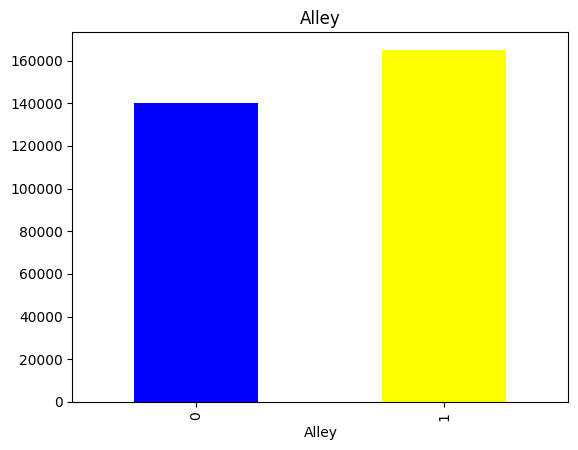

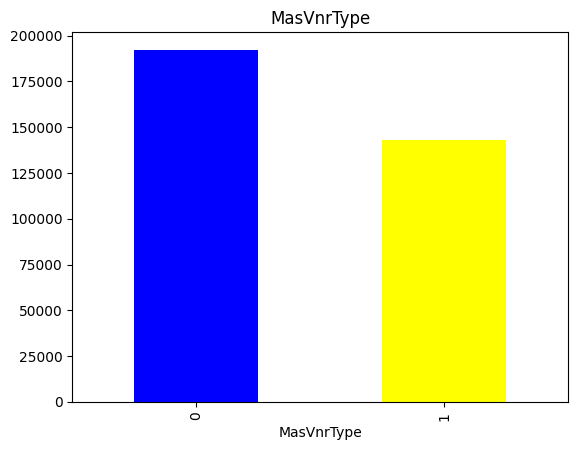

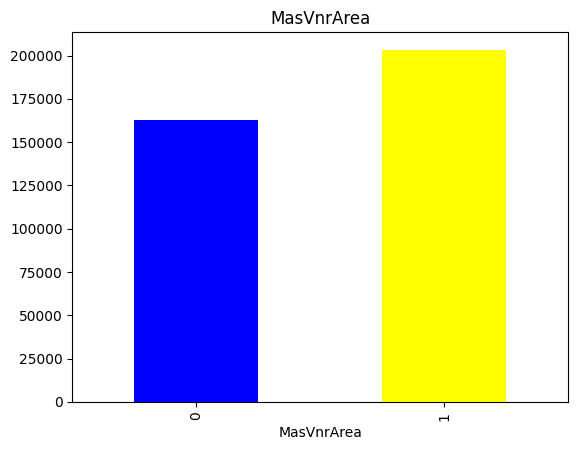

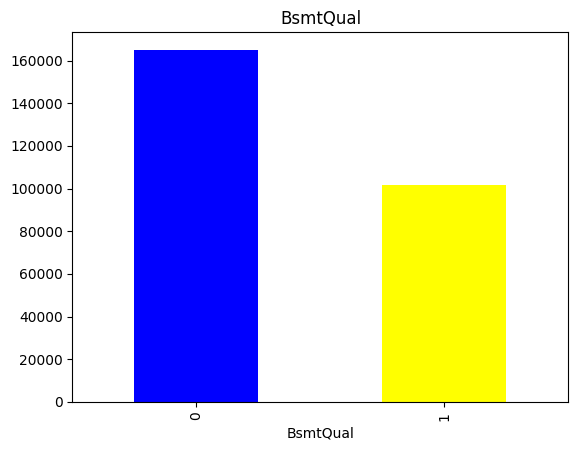

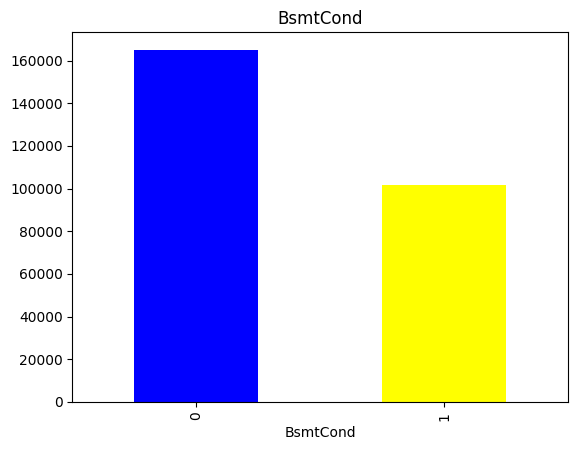

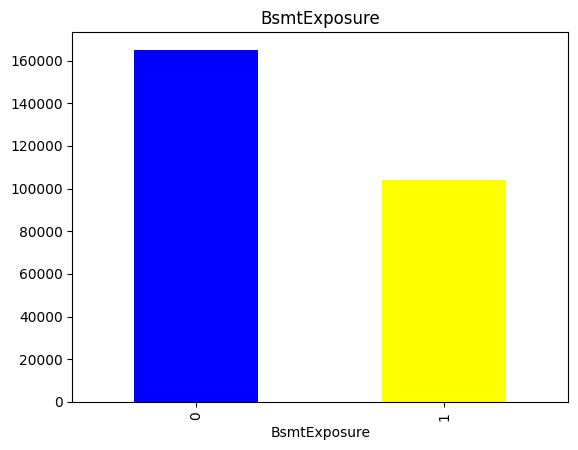

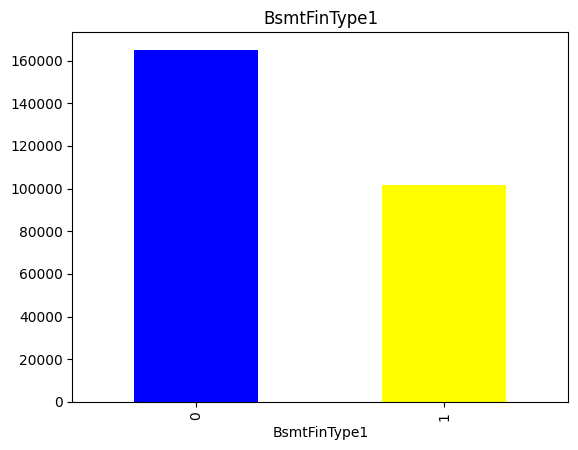

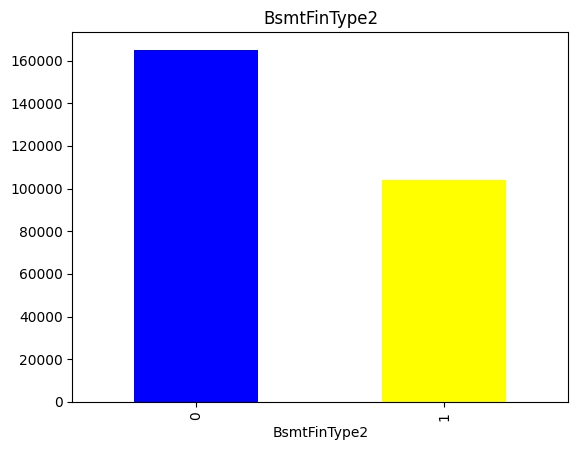

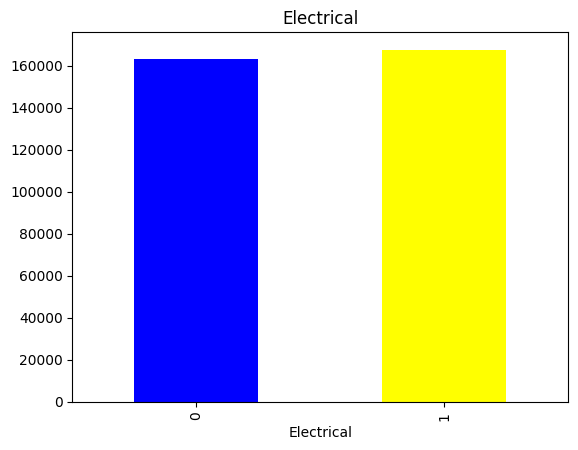

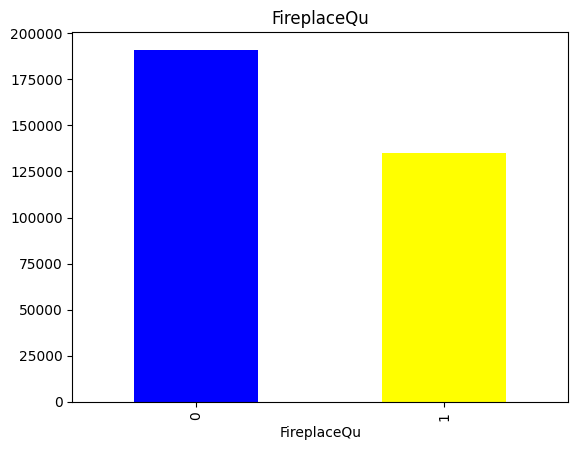

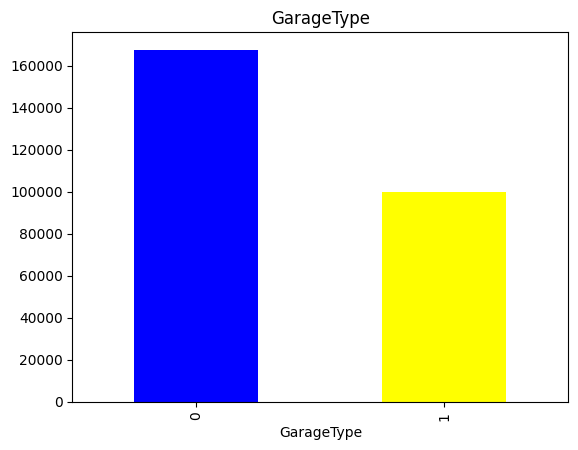

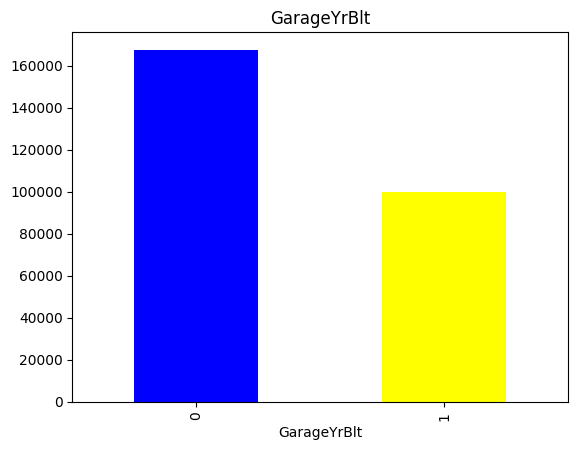

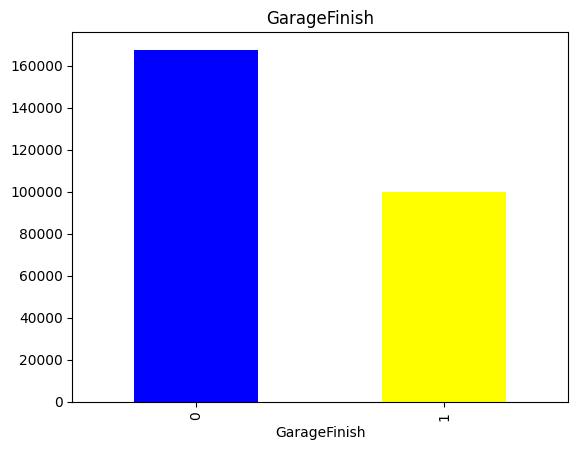

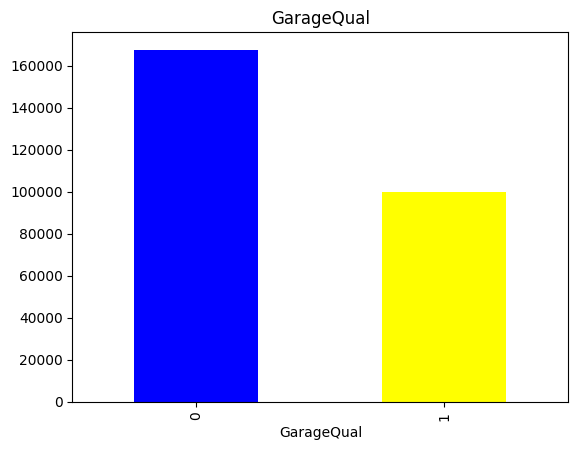

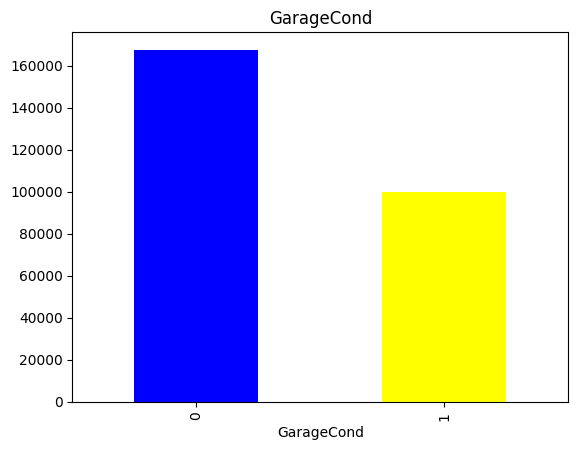

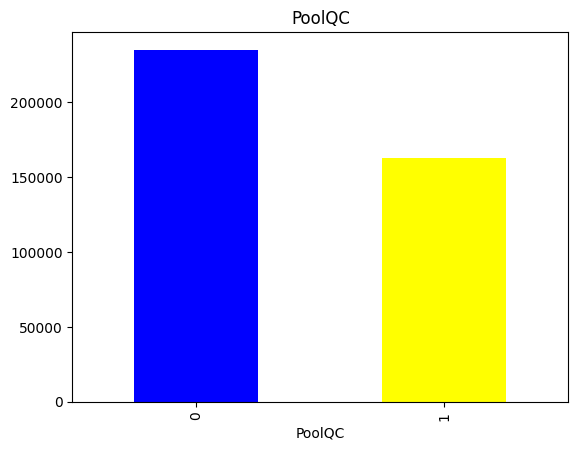

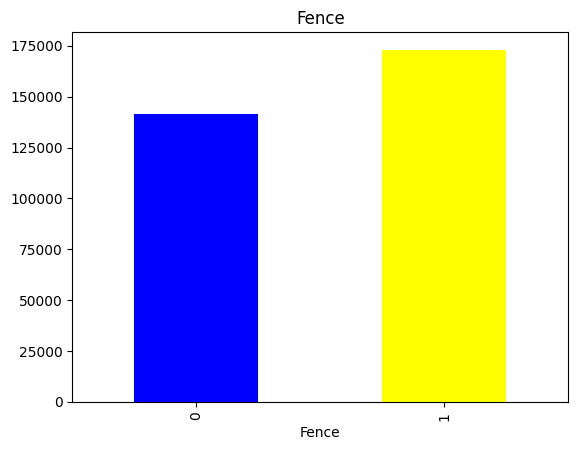

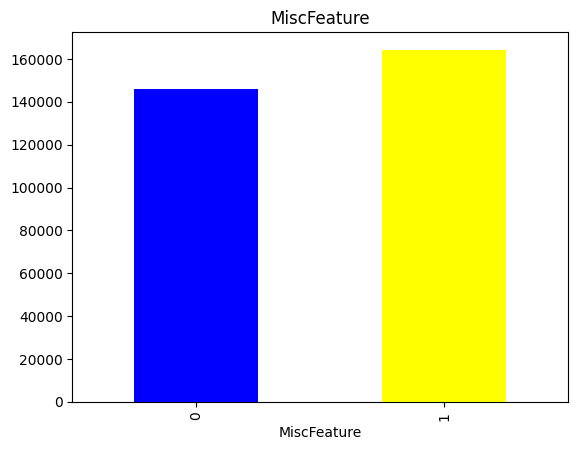

Conclusion:-
 AS WE CAN SEE THAT THE MISSING VALUES HAVE A GREATER IMPACT ON THE SALESPRICE AS WE CAN INFER FROM THE BARGRAPH SINCE THE BAR OF THE MISSING VALUES IS GREATER AND IF WE INCLUDE THOSE VALUES THEN THE SALESPRICE MIGHT ALSO INCREASE SO WE NEED TO FILL THOSE NAN VALUES


In [ ]:
#TO FIND THE RELATION BETWEEN THE MISSING VALUES AND THE SALES PRICE COZ WE R FINDING HOUSE PRICE
d2=[null for null in data.columns if data[null].isnull().sum()>=1]
for i in d2:
    d1=data.copy()
    #HERE I AM ASSIGNING ONE TO THE NULL VALUES AND 0 TO THOSE WITH NO NULL VALUES IN A PARTICULAR COLUMN
    d1[i]=np.where(d1[i].isnull(),1,0)

    #HERE WE USE MEDIAN TO COMPARE BECAUSE MEDIAN IS LESS AFFECTED BY EXTREME VALUES AND IT IS THE BETTER CENTRAL TENDANCY COMPARED TO THE OTHERS
    d1.groupby(i)['SalePrice'].median().plot.bar(color=('Blue','Yellow'))
    plt.title(i)
    plt.show()

print("Conclusion:-\n AS WE CAN SEE THAT THE MISSING VALUES HAVE A GREATER IMPACT ON THE SALESPRICE AS WE CAN INFER FROM THE BARGRAPH SINCE THE BAR OF THE MISSING VALUES IS GREATER AND IF WE INCLUDE THOSE VALUES THEN THE SALESPRICE MIGHT ALSO INCREASE SO WE NEED TO FILL THOSE NAN VALUES")

In [ ]:
#TO CHECK NUMBER OF NUMERICAL ATTRIBUTES
num=[dt for dt in data.columns if data[dt].dtypes !=object]

print("THE NUMBER OF NUMERICAL FEATURES IS",len(num))

#TO PRINT ALL THE ATTRIBUTES WITH NUMERICAL VALUE
print(data[num])

THE NUMBER OF NUMERICAL FEATURES IS 38
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  

THE TEMPORAL ATTRIBUTES ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
INFERENCE:-
HERE WE CAN INFER THAT OUT 38 NUMERICAL VALUES THERE ARE A TOTAL OF 4 TEMPORAL ATTRIBUTES


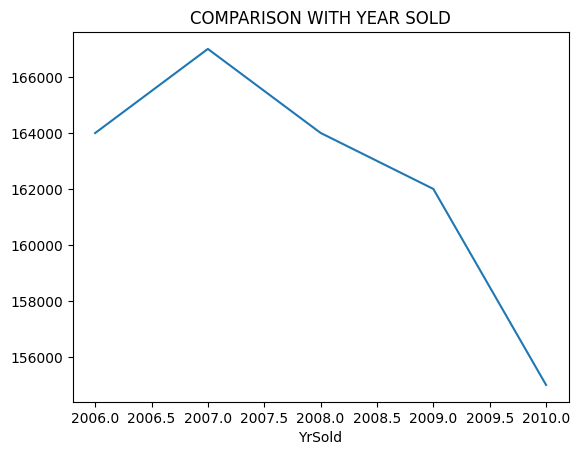

INFERENCE:-
WE CAN SEE AN UNUSAL TREND WHERE THE HOUSE PRICES INCREASED TILL 2007 BUT STARTED TO DECLINE AFTER 2007 WHICH SHLD NOT BEEN THE CASE
GENERALLY THE PRICE OF THE HOUSES IS SENT TO INCREASE AS TIME GOES BUT HERE WE FIND AN OPPOSITE TREND


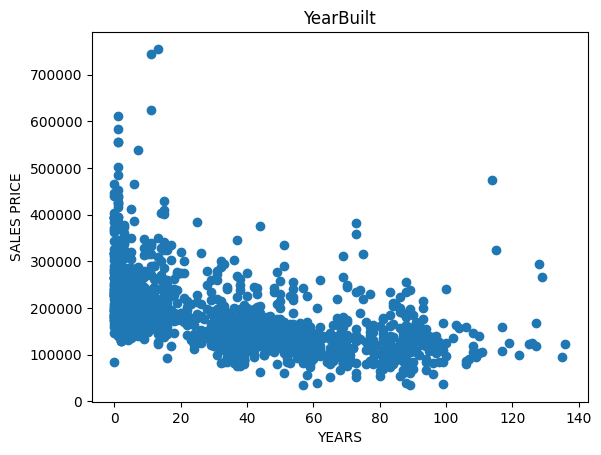

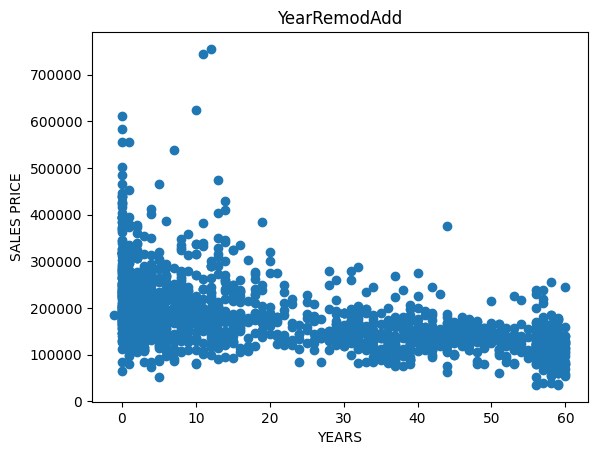

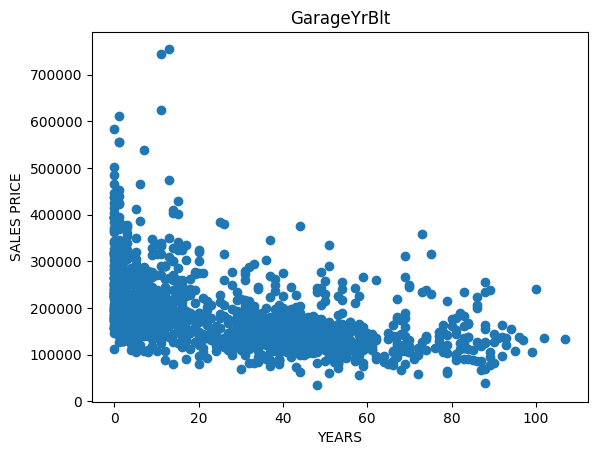

INFERENCE:-
HERE WE CAN FIND THAT THE SALES PRICE OF THE NEWLY BUILT HOUSES ARE HIGH AND THE PRICES GETS REDUCES AS TIME PASSES
FROM THE YEARS RENOVATION WE CAN FIND THAT THE SALES PRICE OF THE HOUSES THAT ARE BEING RECENTLY RENOVATED IS HIGH COMPARED TO THE ONES WHICH ARE RENOVATED LONG BACK
FRM THE GARAGE YEAR BUILT WE CAN FIND THAT THE ONES IN WHICH GARAGE WAS RECENTLY BUILT THE SALES PRICE IS HIGH COMPARED TO THOSE IN WHCIH THE GARAGE WAS OLDER 


In [ ]:
#OUT OF THOSE NUMERICAL ATTRIBUTES SOME ARE TEMPORAL ATTRIBUTES THAT IS TIME BASED ATTRIBUTES SO NOW WE WILL BE PRINTING ALL THE TEMPORAL ATTRIBUTES
tmp=[tp for tp in num if 'Yr' in tp or 'Year' in tp]

print("THE TEMPORAL ATTRIBUTES",tmp)
print("INFERENCE:-\nHERE WE CAN INFER THAT OUT 38 NUMERICAL VALUES THERE ARE A TOTAL OF 4 TEMPORAL ATTRIBUTES")

#FINDING THE RELATIONS BETWEEN DIFFERENT TEMPORAL ATTRIBUTES

data.groupby("YrSold")["SalePrice"].median().plot()
plt.title("COMPARISON WITH YEAR SOLD")
plt.show()
print("INFERENCE:-\nWE CAN SEE AN UNUSAL TREND WHERE THE HOUSE PRICES INCREASED TILL 2007 BUT STARTED TO DECLINE AFTER 2007 WHICH SHLD NOT BEEN THE CASE\nGENERALLY THE PRICE OF THE HOUSES IS SENT TO INCREASE AS TIME GOES BUT HERE WE FIND AN OPPOSITE TREND")

for i in range(len(tmp)-1):
    d3=data.copy()
    #HERE WE R SUBTRACTING THE YEAR SOLD WITH THE RESPECTIVE OTHER YEAR PARAMETERS
    d3[tmp[i]]=d3['YrSold']-d3[tmp[i]]

    plt.scatter(d3[tmp[i]],d3['SalePrice'])
    plt.title(tmp[i])
    plt.ylabel("SALES PRICE")
    plt.xlabel("YEARS")
    plt.show()

print("INFERENCE:-\nHERE WE CAN FIND THAT THE SALES PRICE OF THE NEWLY BUILT HOUSES ARE HIGH AND THE PRICES GETS REDUCES AS TIME PASSES\nFROM THE YEARS RENOVATION WE CAN FIND THAT THE SALES PRICE OF THE HOUSES THAT ARE BEING RECENTLY RENOVATED IS HIGH COMPARED TO THE ONES WHICH ARE RENOVATED LONG BACK\nFRM THE GARAGE YEAR BUILT WE CAN FIND THAT THE ONES IN WHICH GARAGE WAS RECENTLY BUILT THE SALES PRICE IS HIGH COMPARED TO THOSE IN WHCIH THE GARAGE WAS OLDER ")

17
   MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0    

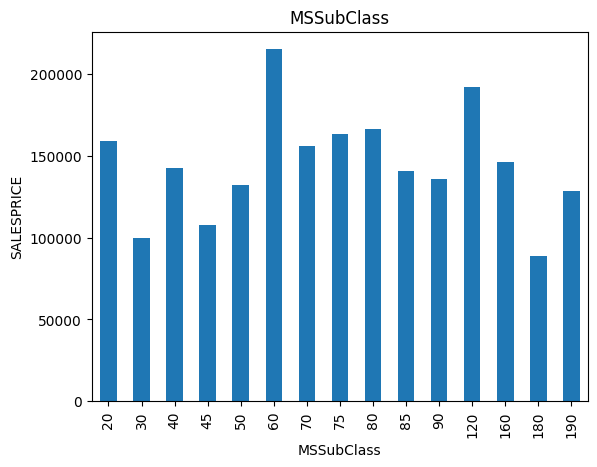

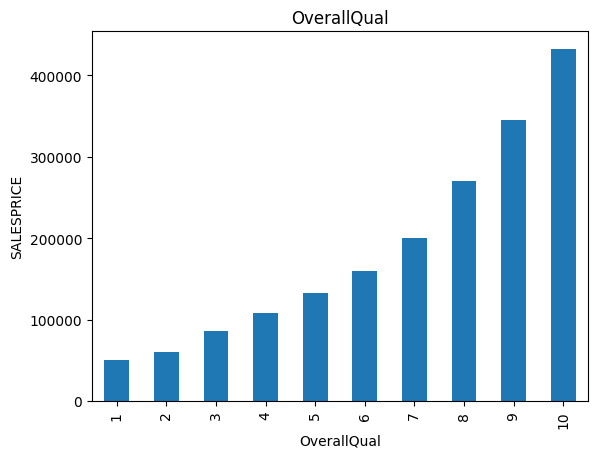

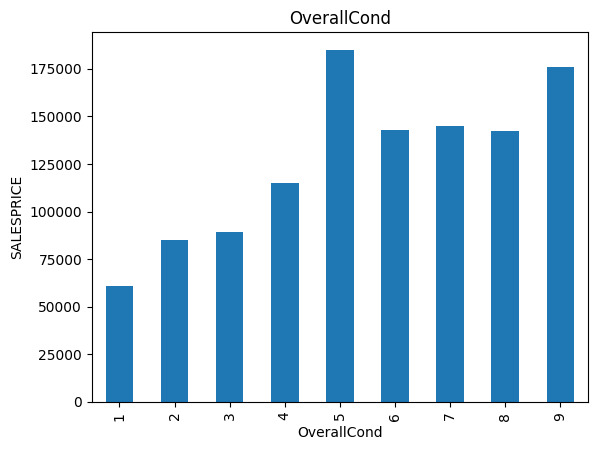

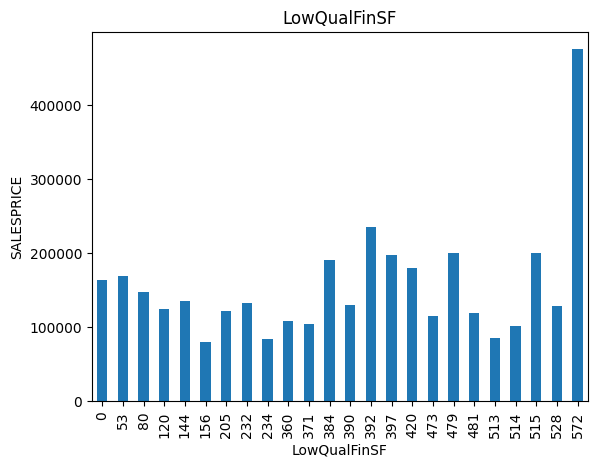

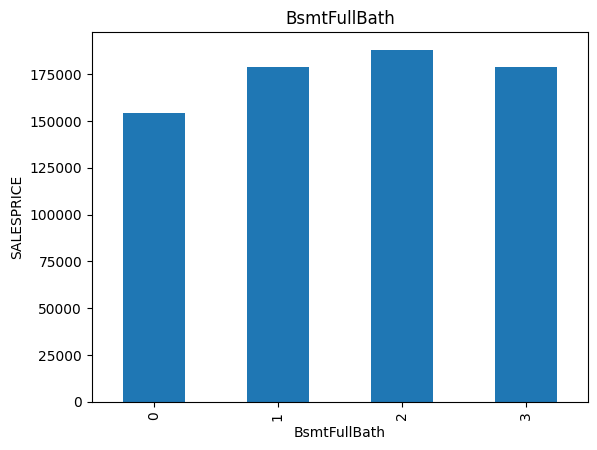

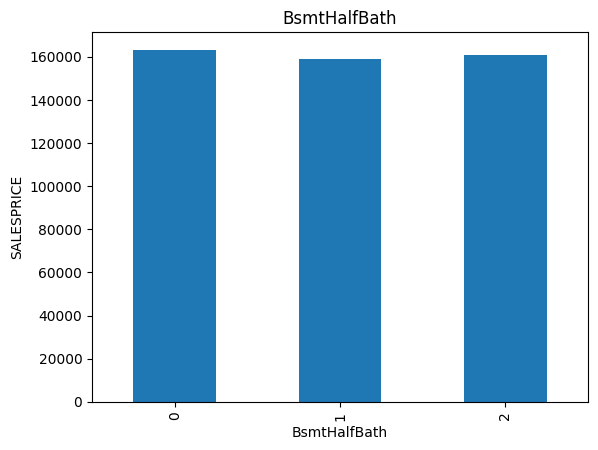

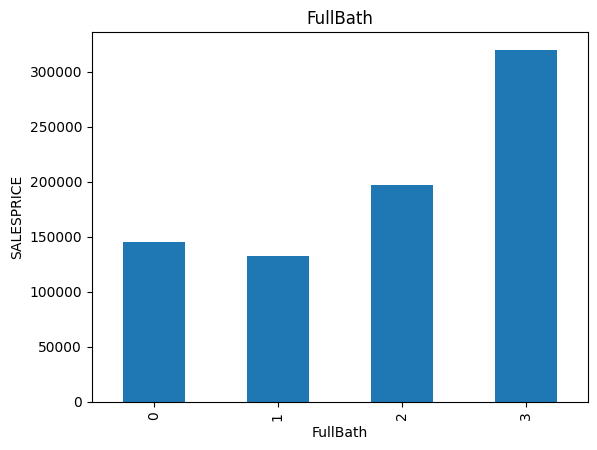

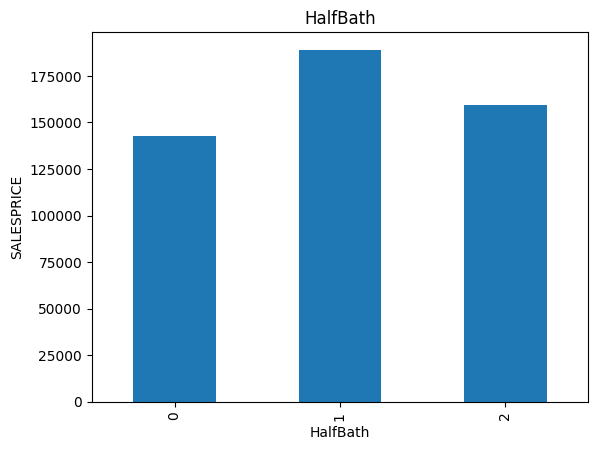

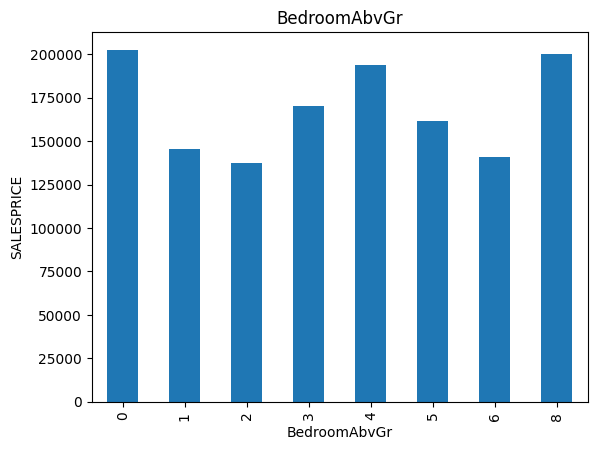

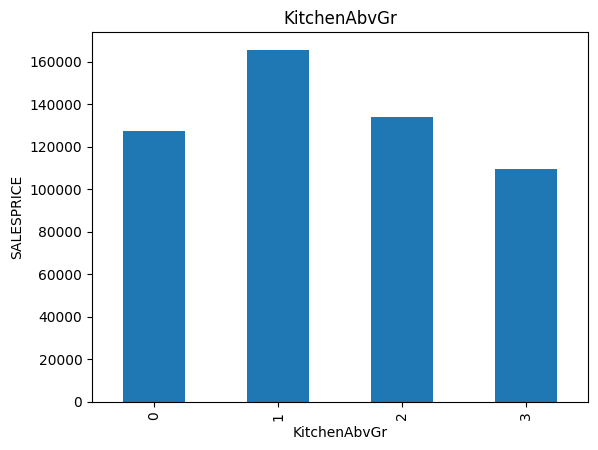

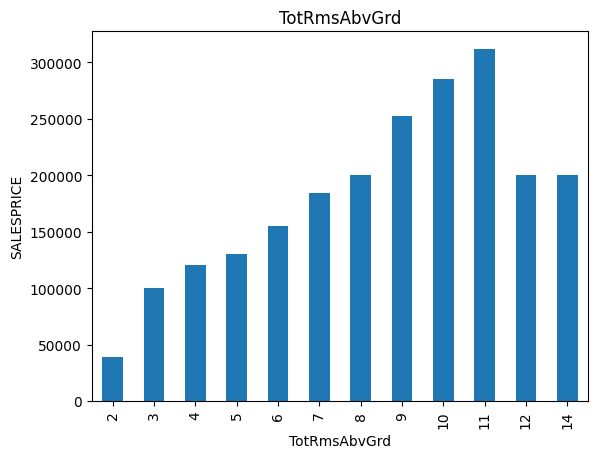

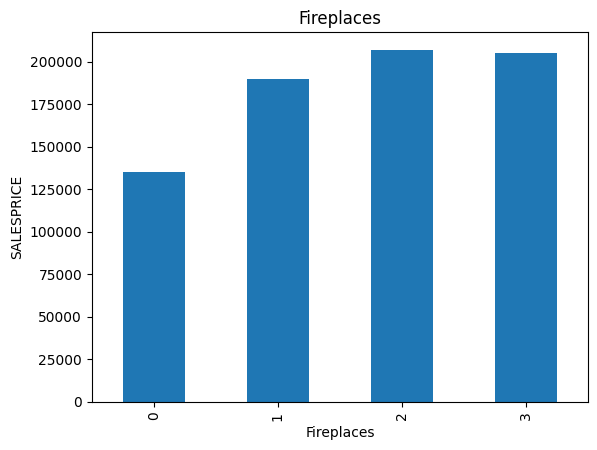

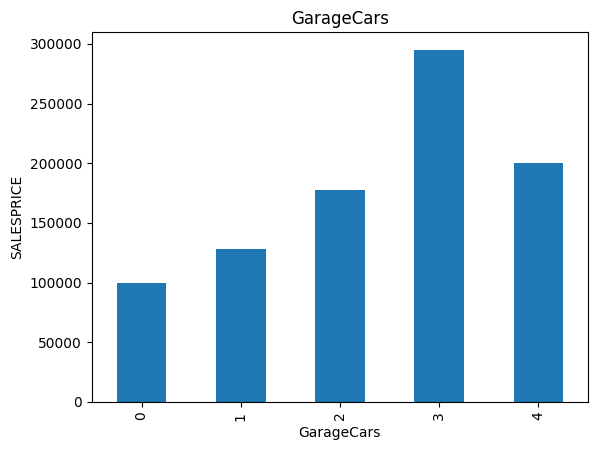

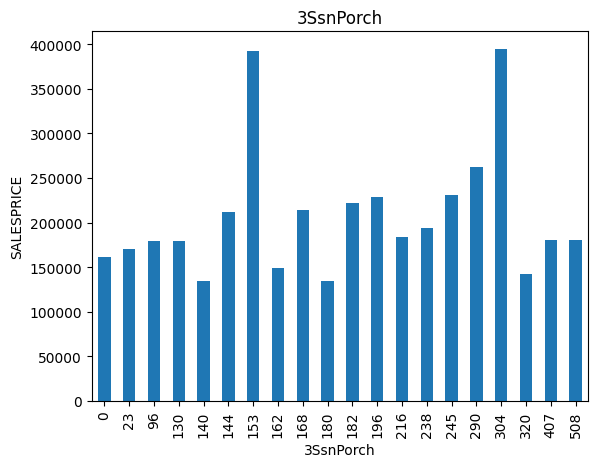

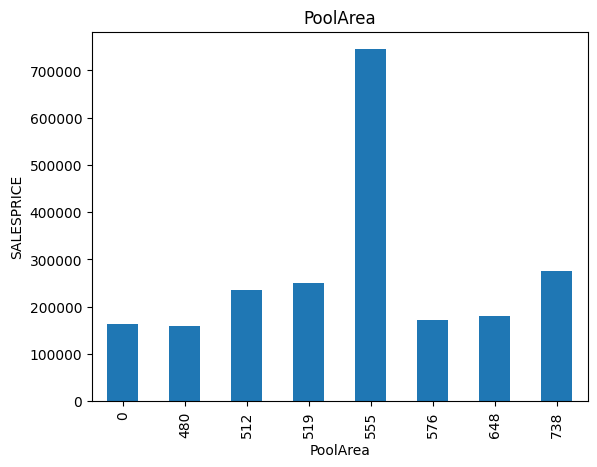

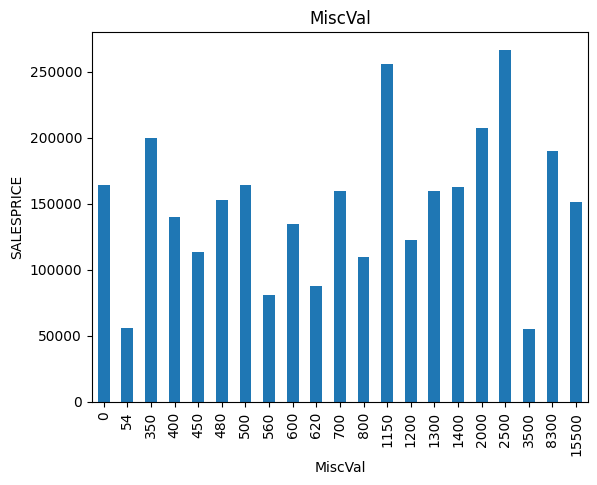

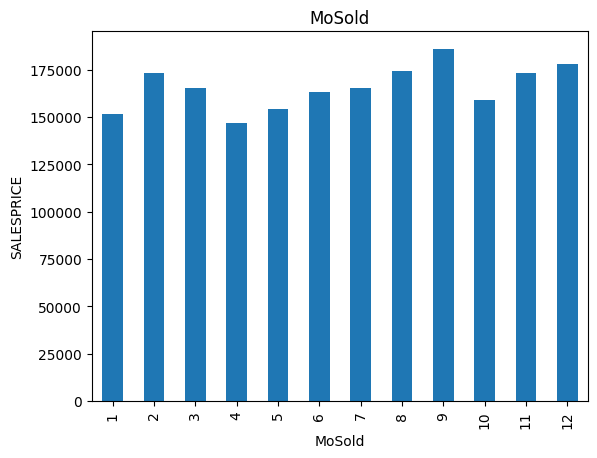

INFERENCE:-
THERE IS AN IRREGULAR TREND IN THE GRAPH OF THE BUILDING CLASS WITH THE SALES PRICE SO WE CAN CONCLUDE THAT THE BUILDING CLASS HAS NO EFFECT ON THE SALES PRICE
AS WE CAN SEE THERE IS AN EXPONENTIAL GROWTH IN THE OVERALL QUALITY GRAPH WHICH MEANS THAT THE SALESPRICE INCREASES AS THE QUALITY OF THE HOUSES INCREASES
ONE CAN INFER THAT THE SALES PRICE OF THE HOUSES WITH THE OVERALL CONDITION RATING HAS 5 AND MORE IS HIGH COMPARED TO THE ONES LESS THAN THAT
THERE IS AN IRREGULAR TREND IN THE GRAPH OF LOW QUALITY FINISHED SQUARE FEET WITH THE SALES PRICE SO WE CAN ALSO CONCLUDE THAT THE SALES PRICE IS NOT AFFECTED BY THIS
FROM THE BASEMENT FULL BATHROOMS GRAPH WE CAN INFER THAT THE SALES PRICE INCREASES EXPONENTIALLY BUT DECREASES WHEN THERE ARE 3 FULL BATHROOMS IN THE BASEMENT
FROM THE BASEMENT FULL BATHROOMS GRAPH WE CAN INFER THAT THE SALES PRICE IS MORE OR LESS THE SAME FOR ALL THE CATEGORIES SO WE CAN CONCLUDE THAT IT DOESN'T PLAY A MUCH ROLE IN THE AFFECTING THE SALES PRICE

In [ ]:
#TO PRINT THE DISCREETE ATTRIBUTES FROM THE NUMERICAL ATTRIBUTES
#HERE WE R NOT INCLUDING THE YEAR VALEUS AND THE ID COZ THOSE ARE TEMPORAL VALUES
#HERE WE TAKE 25 BECAUSE VARIABLES WITH LESS THAN 25 UNIQUE VALUES ARE OFTEN EASIER TO ANALYZE AS CATEGORIES AND THE OTHER THING IS PRACTICAL RULE IS THAT IF THERE ARE MORE THAN 25 UNIQUE VALUES THEN IT'S MORE LIKELY TO BE CONTINOUS
dsf=[ds for ds in num if len(data[ds].unique())<25 and ds not in tmp and ds != 'Id']

print(len(dsf))
print(data[dsf].head())

for i in dsf:
    dt3=data.copy()
    dt3.groupby(i)["SalePrice"].median().plot.bar()
    plt.title(i)
    plt.ylabel("SALESPRICE")
    plt.xlabel(i)
    plt.show()

print("INFERENCE:-")
print("THERE IS AN IRREGULAR TREND IN THE GRAPH OF THE BUILDING CLASS WITH THE SALES PRICE SO WE CAN CONCLUDE THAT THE BUILDING CLASS HAS NO EFFECT ON THE SALES PRICE")
print("AS WE CAN SEE THERE IS AN EXPONENTIAL GROWTH IN THE OVERALL QUALITY GRAPH WHICH MEANS THAT THE SALESPRICE INCREASES AS THE QUALITY OF THE HOUSES INCREASES")
print("ONE CAN INFER THAT THE SALES PRICE OF THE HOUSES WITH THE OVERALL CONDITION RATING HAS 5 AND MORE IS HIGH COMPARED TO THE ONES LESS THAN THAT")
print("THERE IS AN IRREGULAR TREND IN THE GRAPH OF LOW QUALITY FINISHED SQUARE FEET WITH THE SALES PRICE SO WE CAN ALSO CONCLUDE THAT THE SALES PRICE IS NOT AFFECTED BY THIS")
print("FROM THE BASEMENT FULL BATHROOMS GRAPH WE CAN INFER THAT THE SALES PRICE INCREASES EXPONENTIALLY BUT DECREASES WHEN THERE ARE 3 FULL BATHROOMS IN THE BASEMENT")
print("FROM THE BASEMENT FULL BATHROOMS GRAPH WE CAN INFER THAT THE SALES PRICE IS MORE OR LESS THE SAME FOR ALL THE CATEGORIES SO WE CAN CONCLUDE THAT IT DOESN'T PLAY A MUCH ROLE IN THE AFFECTING THE SALES PRICE")
print("FROM FULL BATHROOMS ABOVE THE GRADE GRAPH WE CAN INFER THAT THE SALES PRICE INCREASES AS THE NO. OF FULL TOILETS INCREASES")
print("FROM THE HALF BATHROOMS GRAPH WE CAN INFER THAT THE SALES PRICE DOES NOT MORE OR LESS DEPEND ON THE NO. OF HALF BATHS")
print("FROM THE TOTAL BEDROOMS ABOVE GROUND FLOOR GRAPH WE CAN INFER THAT IT DOES NOT HAVE ANY RELATION WITH THE SALES PRICE")
print("FROM THE NO. OF KITCHEN ABOVE THE GRAPH WE CAN INFER THAT AS THE NO. OF KITCHENS INCREASES THE THE SALES PRICE DROPS AT A STEADY RATE")
print("FROM THE TOTAL BEDROOMS ABOVE THE GROUND GRAPH WE CAN INFER THAT THE SALES PRICE INCREASE AS THE NO. OF ROOMS INCREASES AND ONCE IT EXCEEDS 11 IT REDUCES AND BECOMES CONSTANT")
print("FROM THE FIREPLACES GRAPH WE CAN INFER THAT AS THE NUMBER OF FIRE PLACES INCREASES THE SALES PRICE INCREASES")
print("FROM THE GARAGE SIZE GRAPH WE CAN INFER THAT THE SALES PRICE INCREASES AS THE GARAGE SIZE INCREASES AND ONCE IT EXCEEDS 3 IT DROPS DOWN NEARLY 200000")
print("FROM THE THREE SEASON PORCH GRAPH WE CANNOT INFER ANYTHING MUCH AS THE GRAPH HAS AN IRREGULAR TREND")
print("FROM THE POOL AREA GRAPH WE CANNOT INFER MUCH AS THE GRAPH HAS IRREGULAR TREND BUT THE POOL AREA OF 555 SQ FEET HAS THE MOST SALESPRICE")
print("FROM THE MISCELANEOUS FEATURES GRAPH WE CANNOT INFER MUCH AS THE GRPAH HAS AN IRREGULAR TREND")
print("FROM THE MONTH SOLD GRAPH WE CANNOT INFER MUCH AS THE GRAPH FOLLOWS AN IRREGUALR TREND")

16


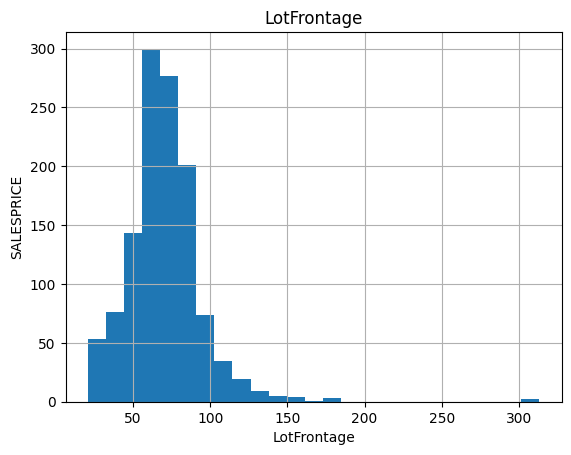

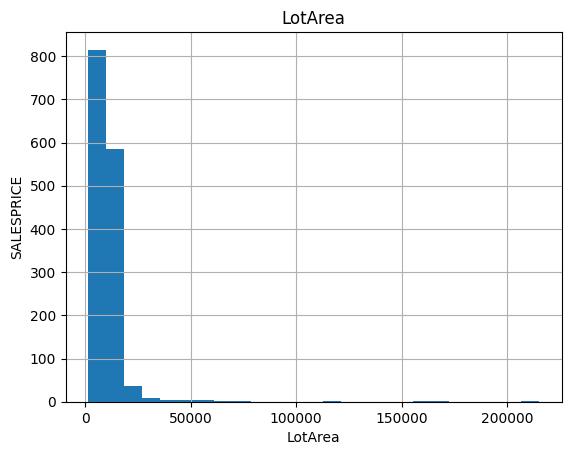

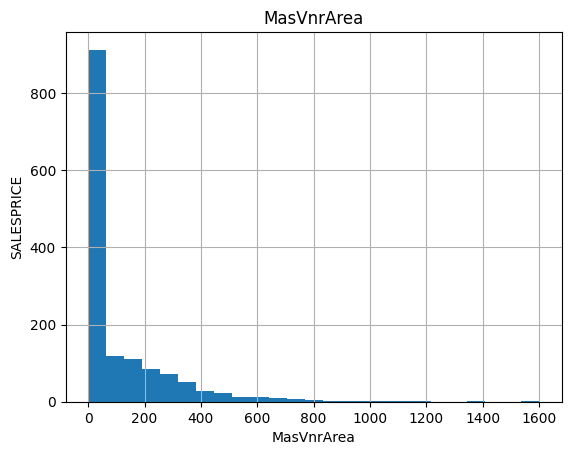

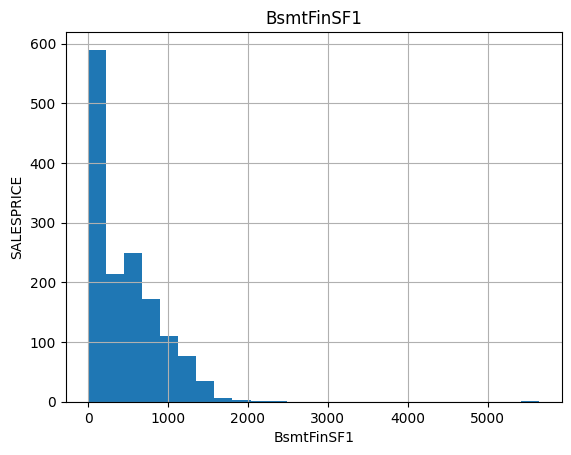

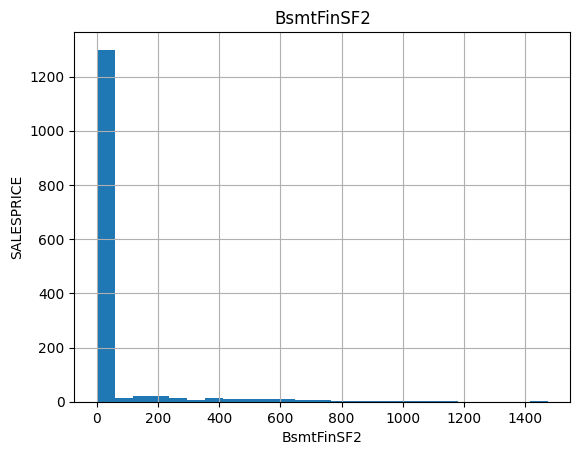

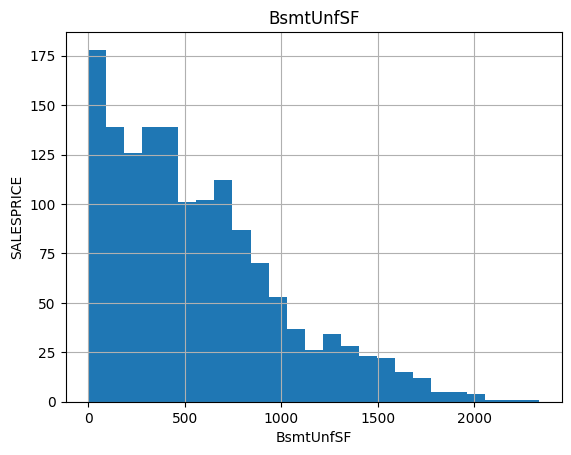

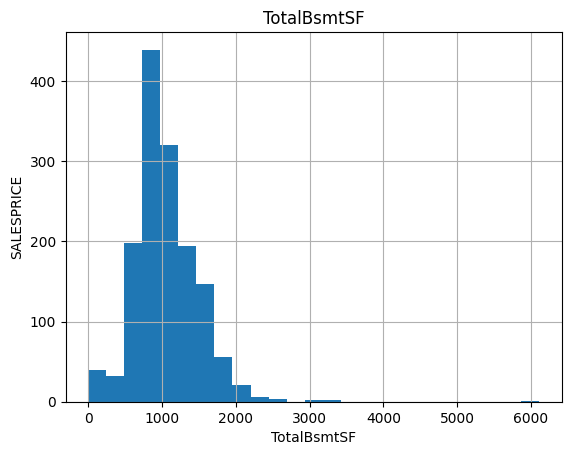

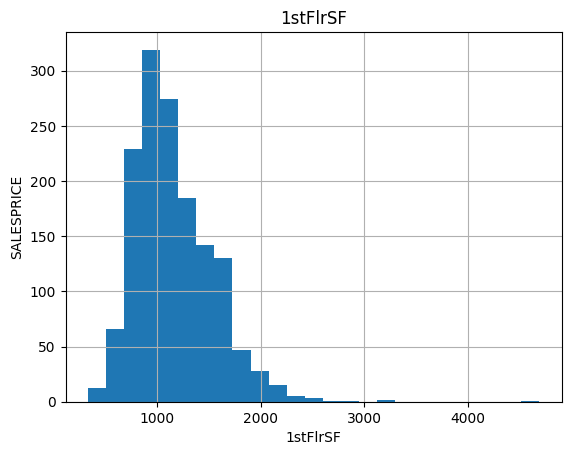

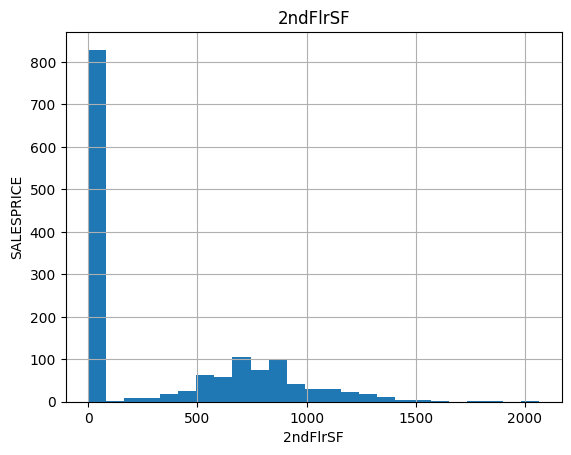

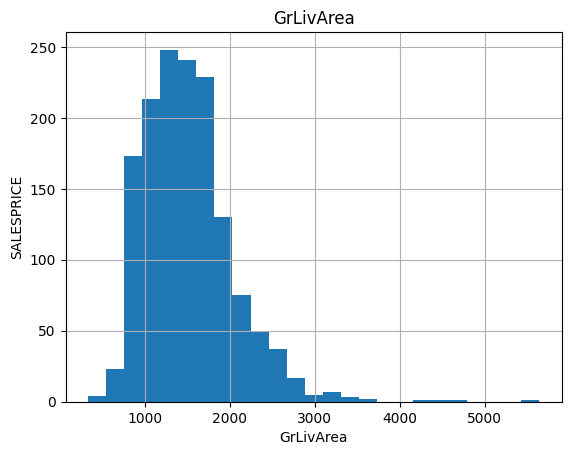

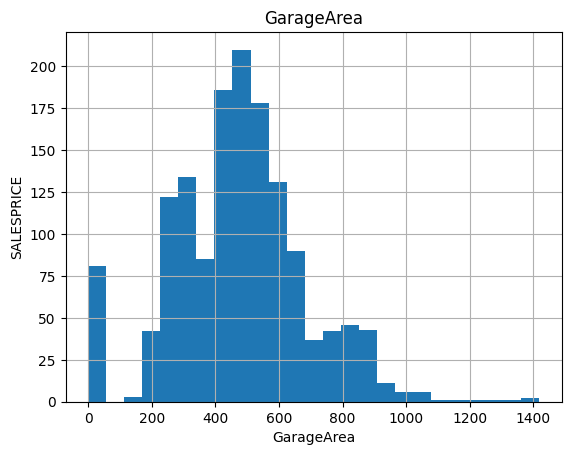

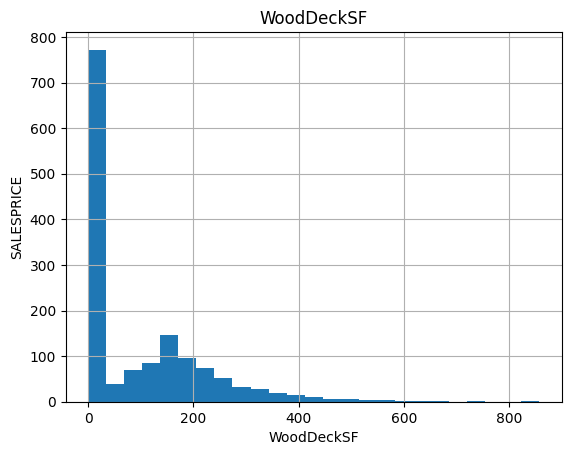

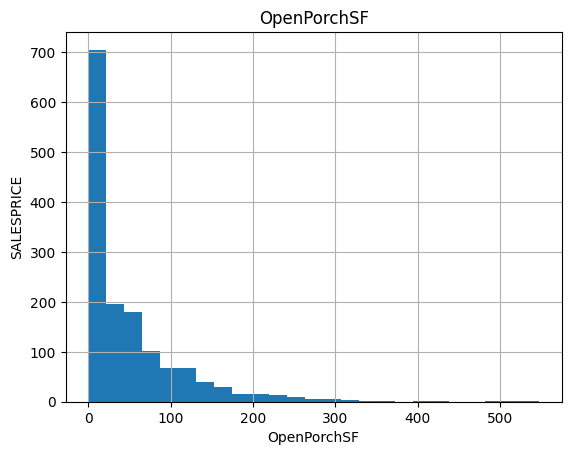

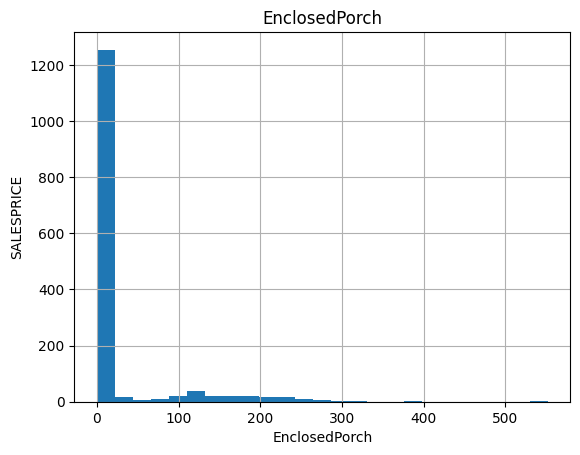

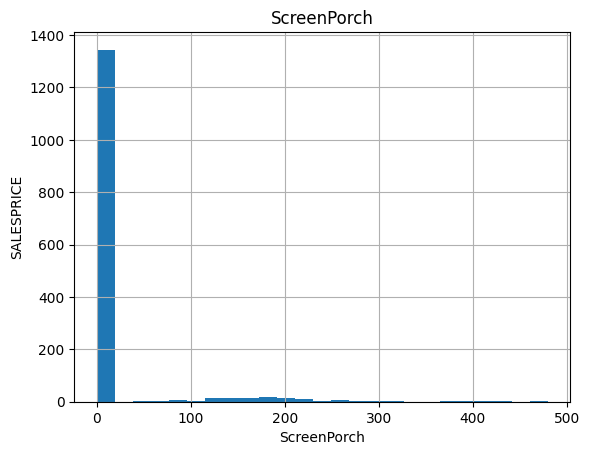

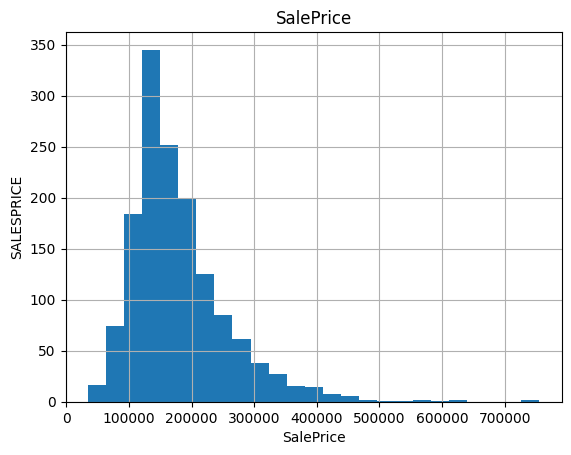



WE CAN INFER THAT ALL THE GRAPHS EXCEPT THE LAST ONE IS NOT CONTINOUS


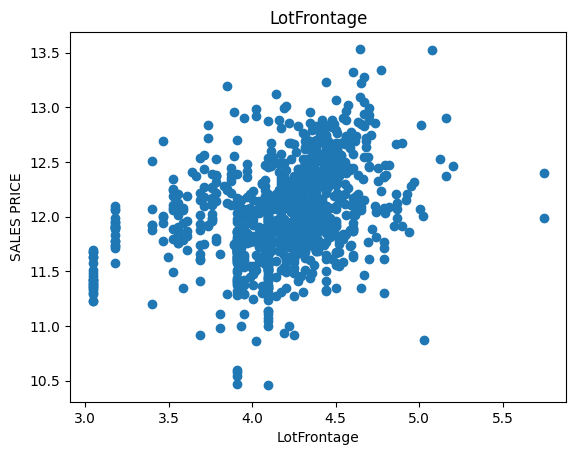

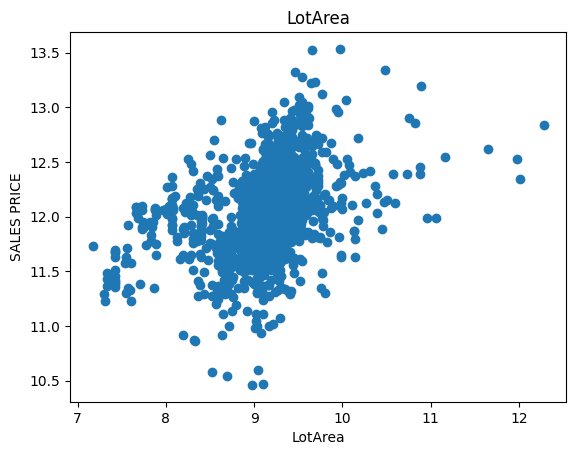

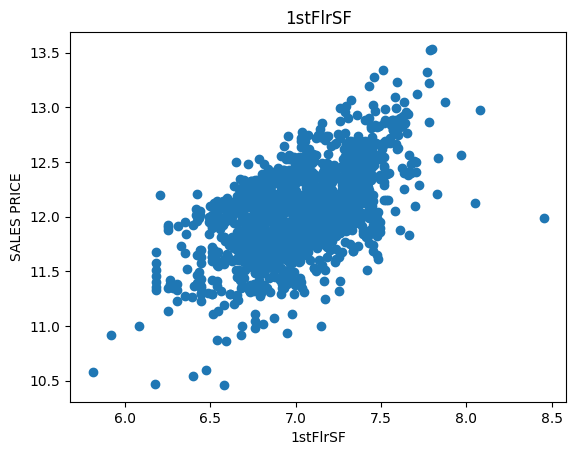

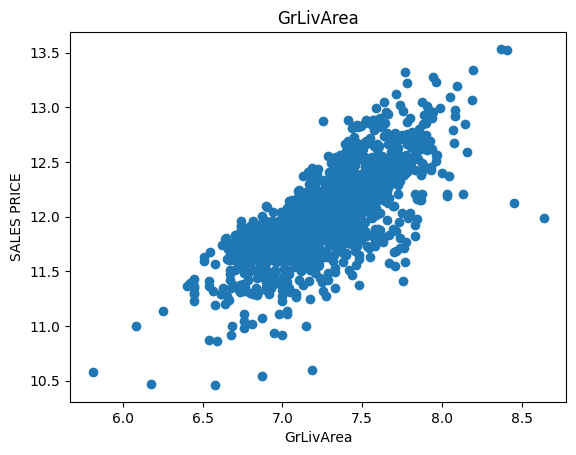

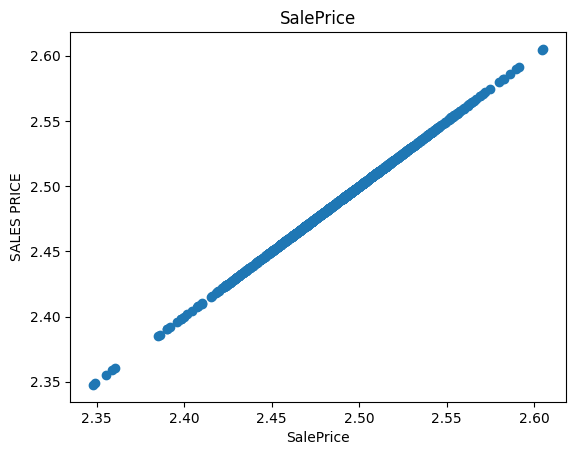

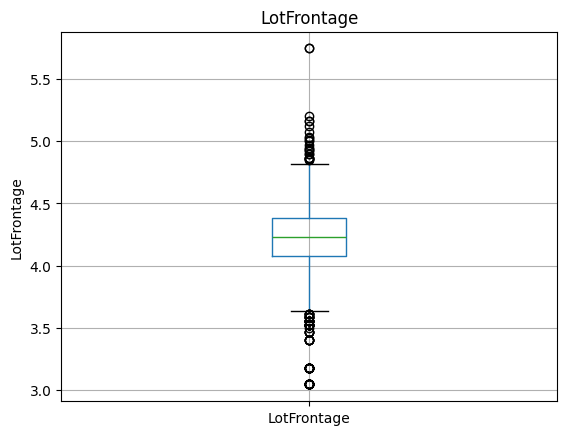

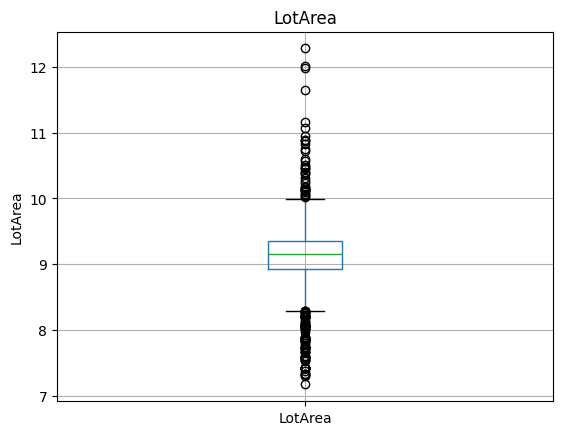

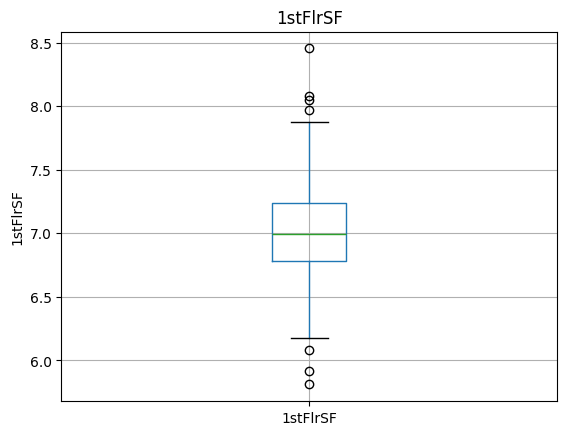

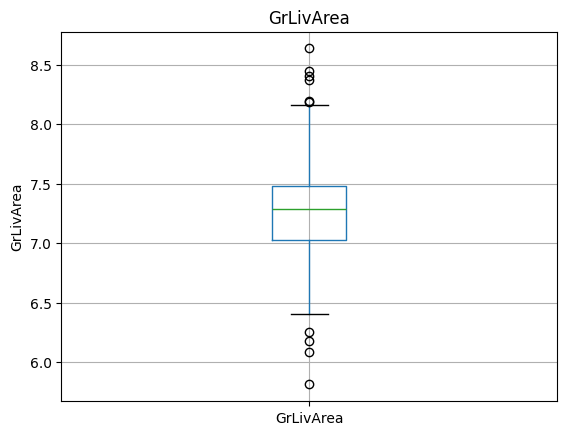

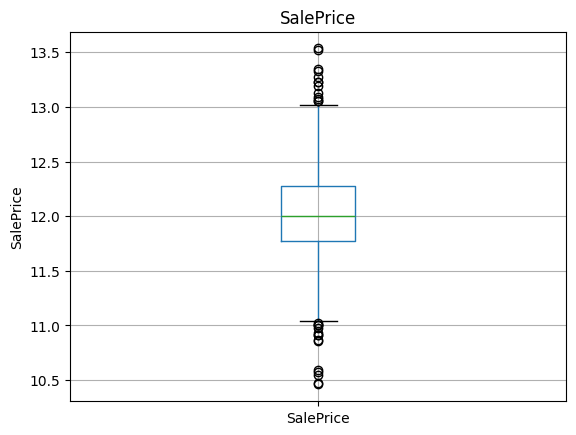



AS U CAN SEE THERE ARE MANY OUTLIERS IN EACH ATTRIBUTE, WE FIND OUTLERS BY SELECTING THOSE POINTS WHICH ARE OUTSIDE THE BOX PLOT


In [ ]:
#TO FIND THE CONTINOUS NUMERICAL ATTRIBUTES
cnt=[ct for ct in num if ct not in dsf and ct !='Id' and ct not in tmp]

print(len(cnt))

#TO FIND THE RELATION BETWEEN CONTINOUS ATTRIBUTES AND SALESPRICE WE USE HISTOGRAMS AS WE LEARNT IN CLASS
for i in cnt:
    d3=data.copy()
    d3[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("SALESPRICE")
    plt.title(i)
    plt.show()

print("\n\nWE CAN INFER THAT ALL THE GRAPHS EXCEPT THE LAST ONE IS NOT CONTINOUS")

#SINCE ITS NOT CONTINOUS NOW WE R GONNA TRANSFORM THEM INTO LOGARTHEMIC DISTRIBUTION
#LOGARTHEMIC DISTRIBUTION IS A DISCREETE DISTRIBUTION.THIS DISTRIBUTION IS USED WHEN THE EVENTS RARELY OCCUR OR THE PROBABILITY OF OBSERVING THE EVENTS DECREASES AS THE EVENT NUMBER INCREASE

d3=data.copy()
d3['SalePrice']=np.log(d3['SalePrice'])
for i in cnt:
    if 0 in d3[i].unique():
        pass
    else:
        d3[i]=np.log(d3[i])
        plt.scatter(d3[i],d3['SalePrice'])
        plt.xlabel(i)
        plt.ylabel("SALES PRICE")
        plt.title(i)
        plt.show()


#FINDING OUTLIERS FOR CONTINOUS ATTRIBUTES, WE USE BOX PLOT TO FIND OUTLIERS COZ BOX PLOT WILL HIGHLIGHT UNUSUAL DATAS
d3=data.copy()
for i in cnt:
    if 0 in d3[i].unique():
        pass
    else:
        d3[i]=np.log(d3[i])
        d3.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

print("\n\nAS U CAN SEE THERE ARE MANY OUTLIERS IN EACH ATTRIBUTE, WE FIND OUTLERS BY SELECTING THOSE POINTS WHICH ARE OUTSIDE THE BOX PLOT")

In [ ]:
#Categorical Variables:-
cat=[i for i in data.columns if data[i].dtypes==object]
print("Categorical features")
print(cat)

#NOW WE R FINDING THE NUMBER OF CATEGORIES EACH CATEGORICAL ATTRIBUTE HAS
print("\nThe No. of Unique category in each attributes")
for i in cat:
    print(i,len(data[i].unique()))

Categorical features
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

The No. of Unique category in each attributes
MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
Centr

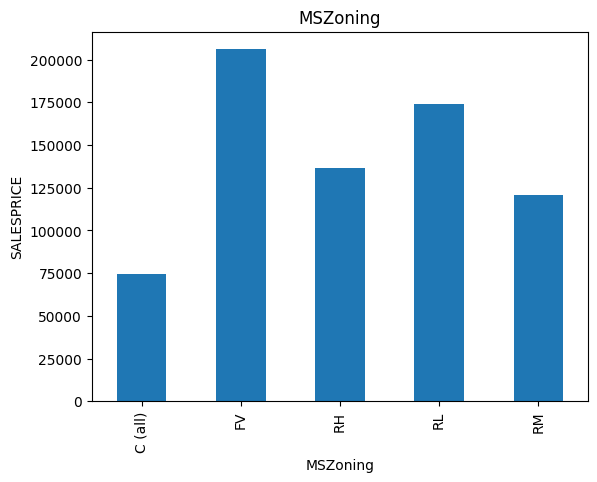

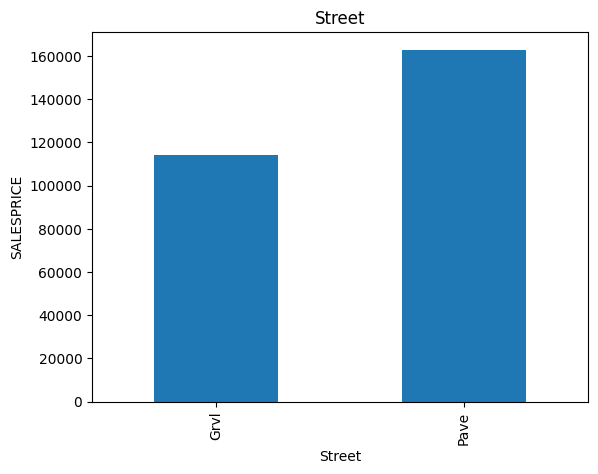

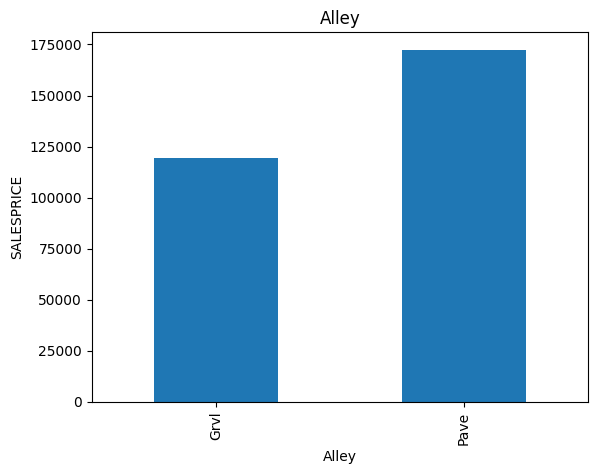

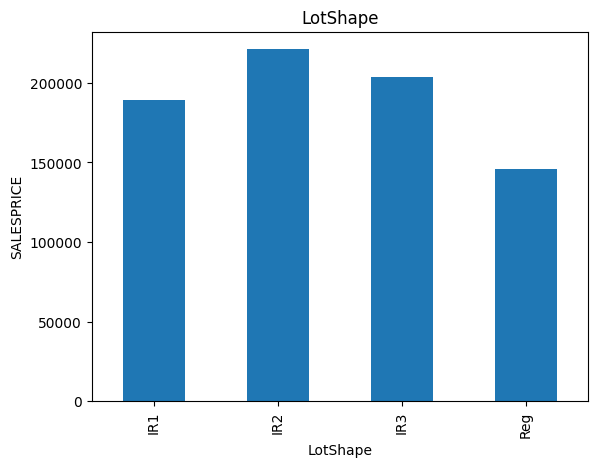

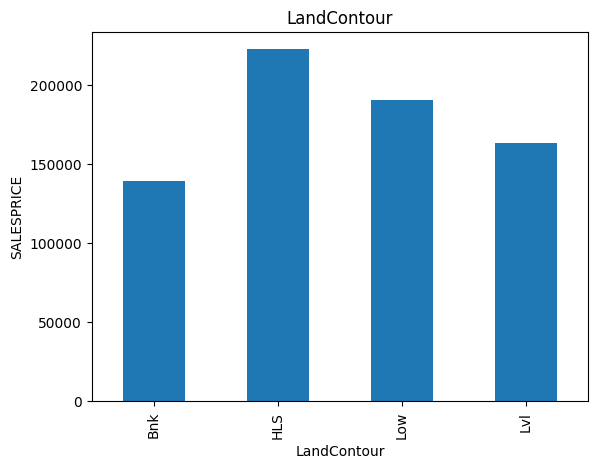

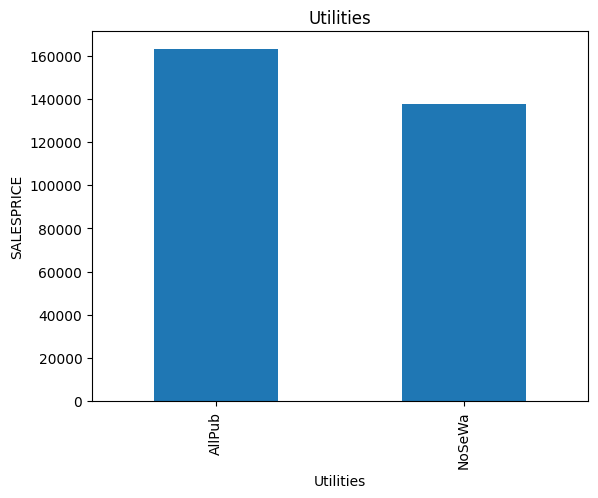

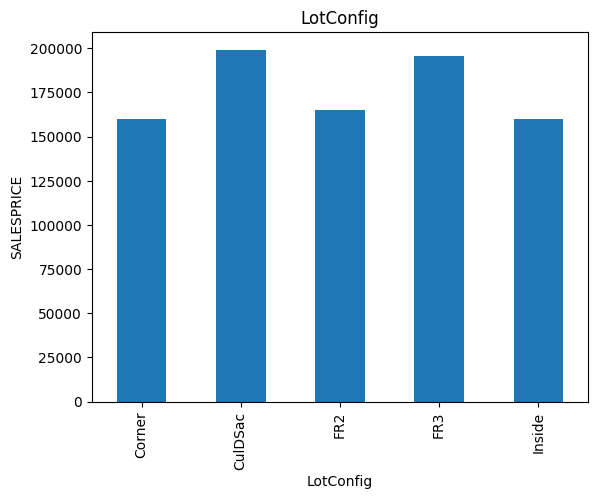

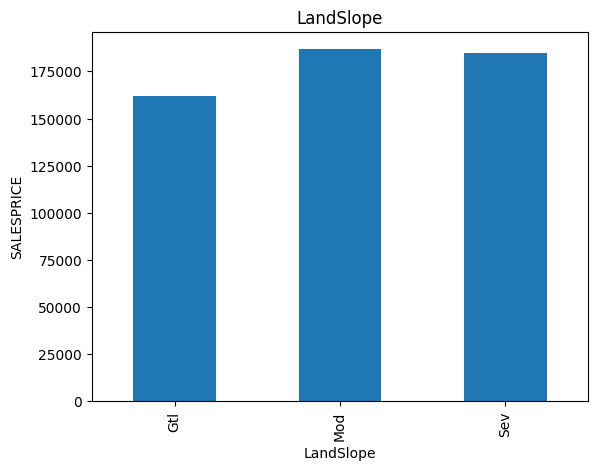

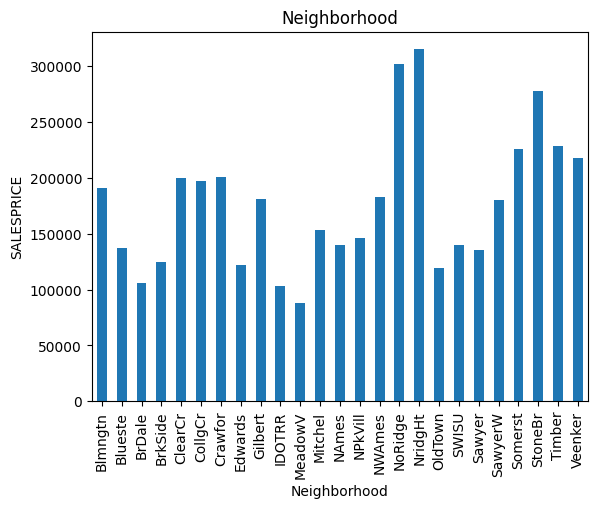

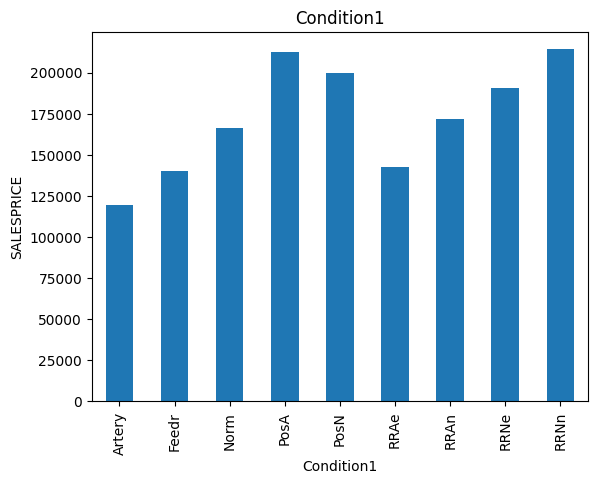

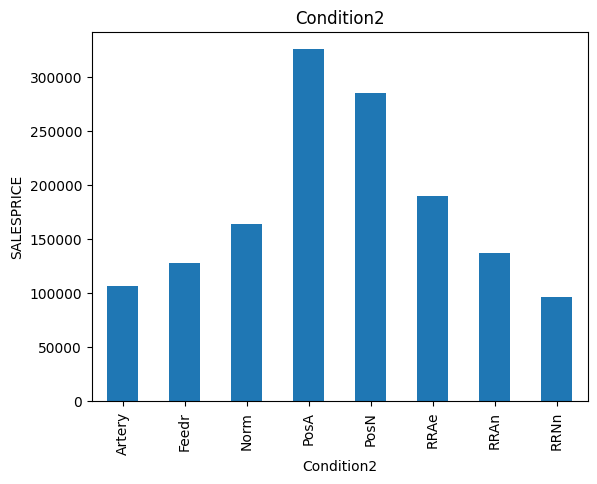

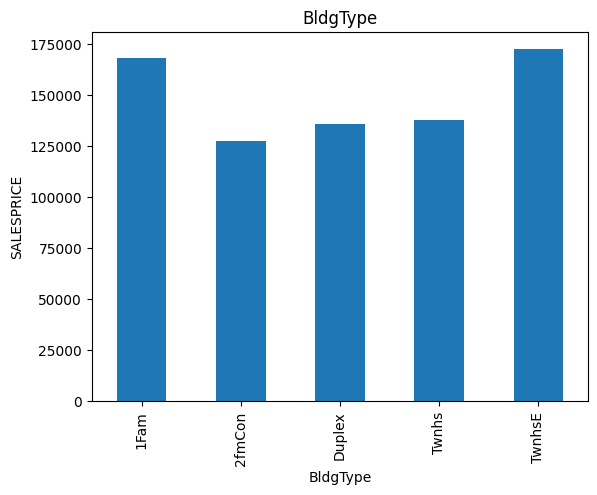

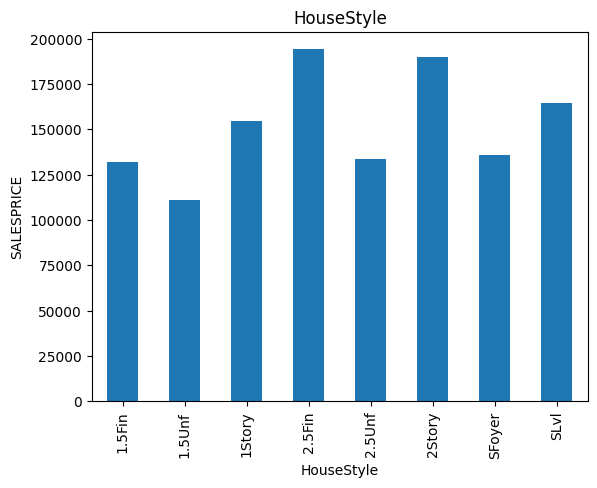

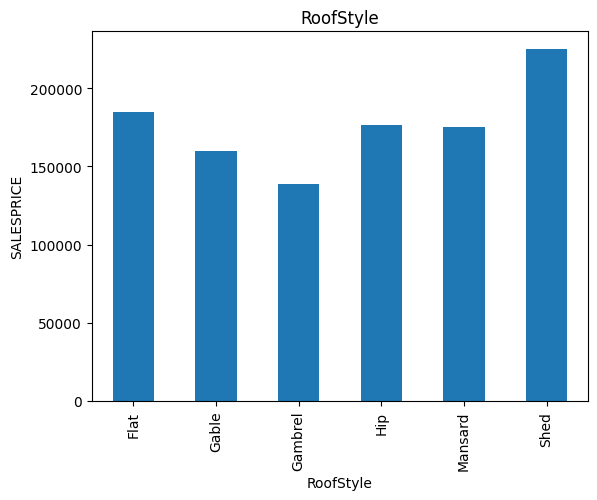

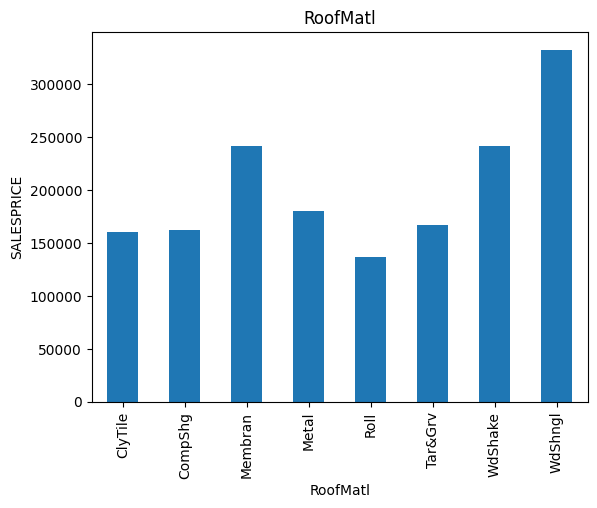

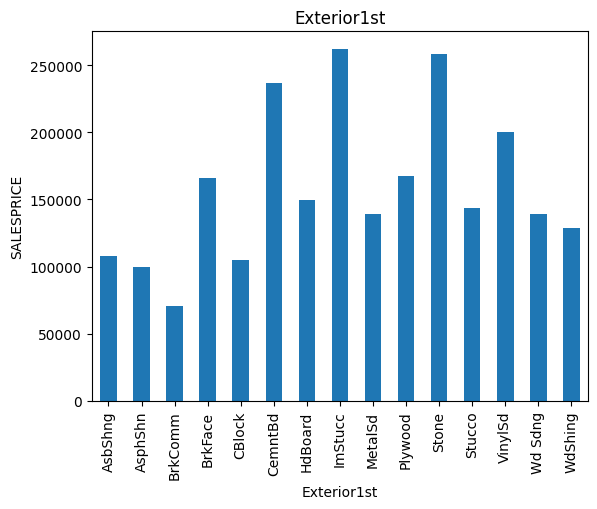

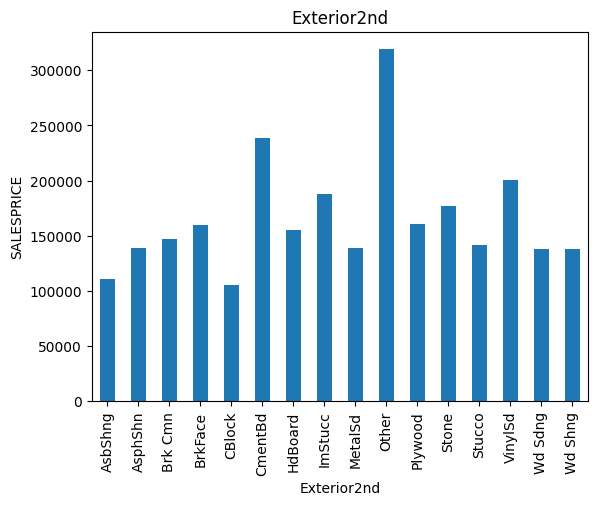

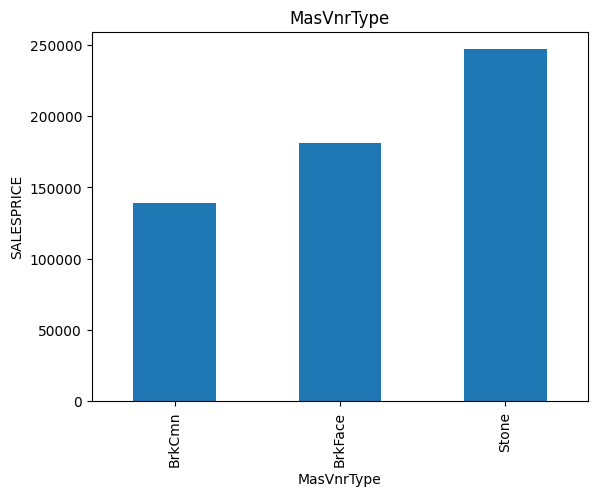

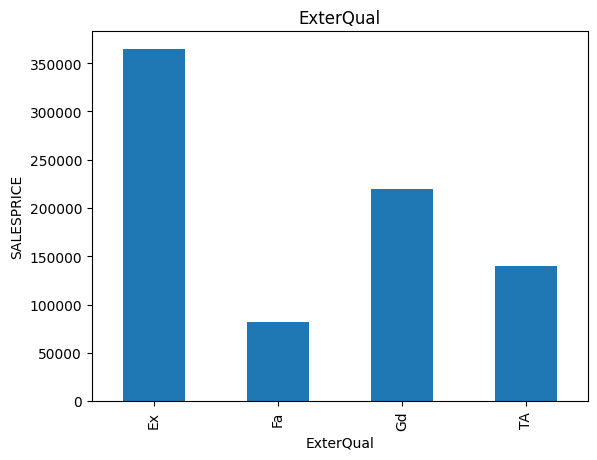

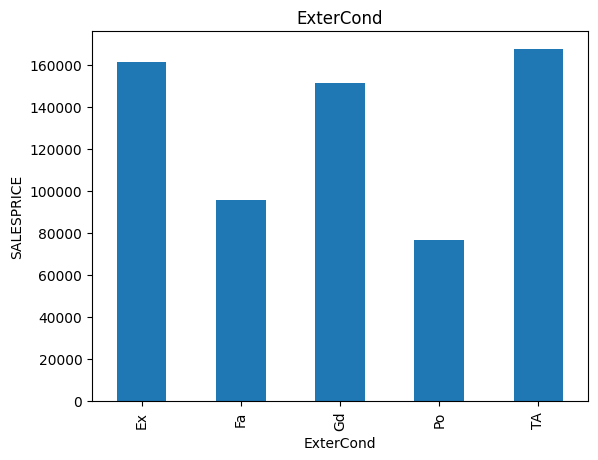

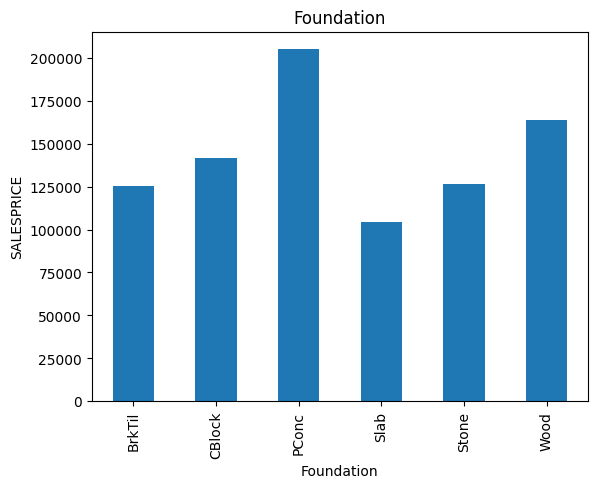

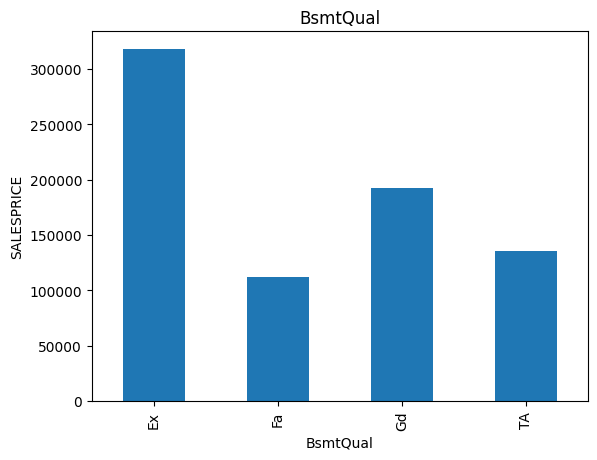

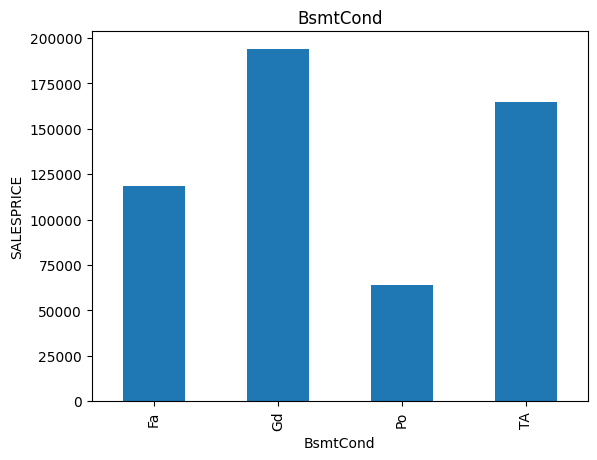

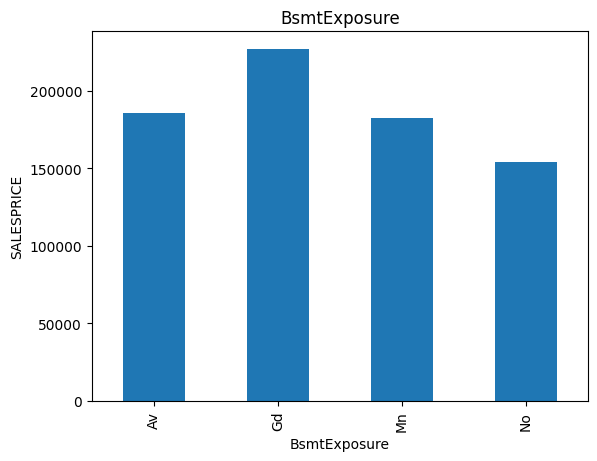

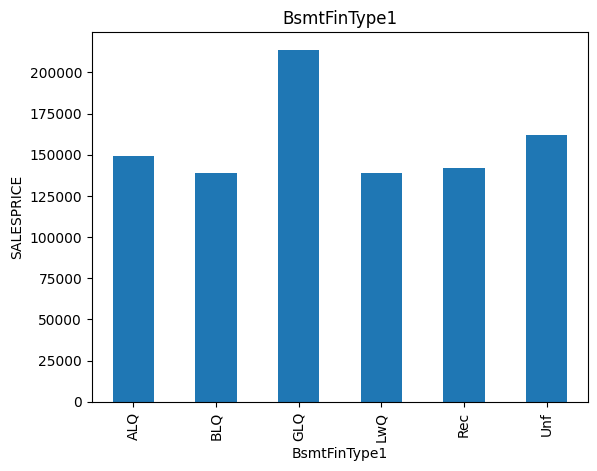

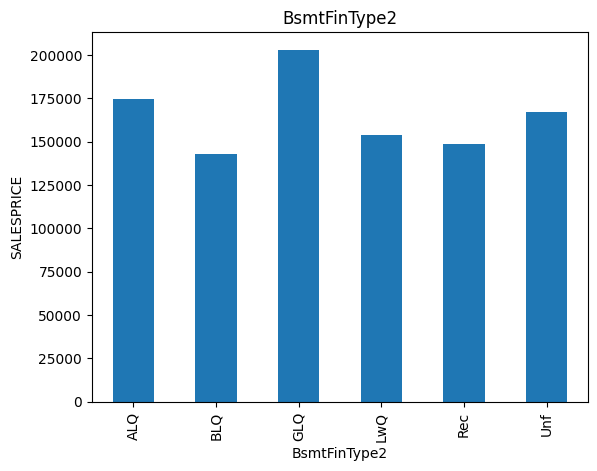

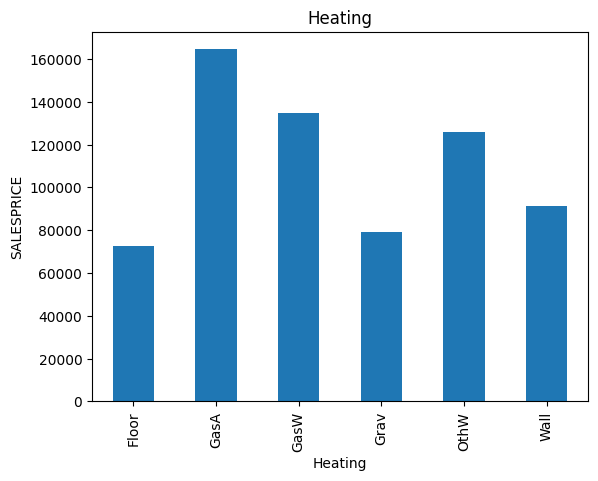

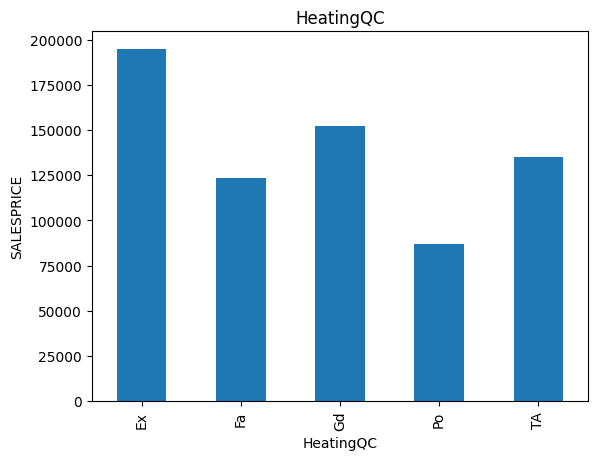

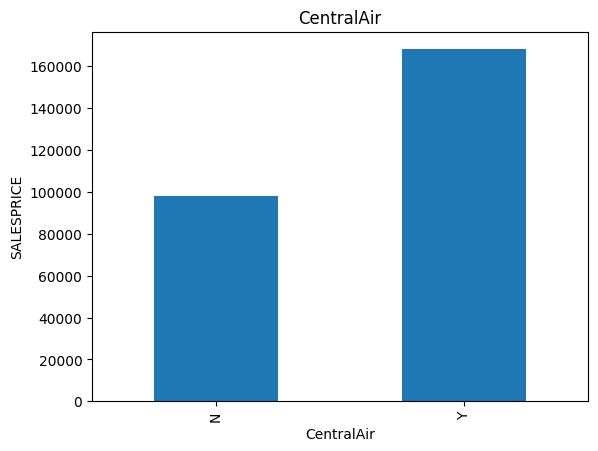

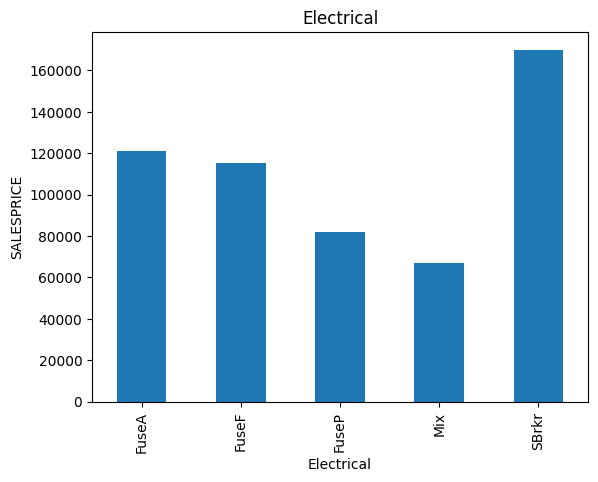

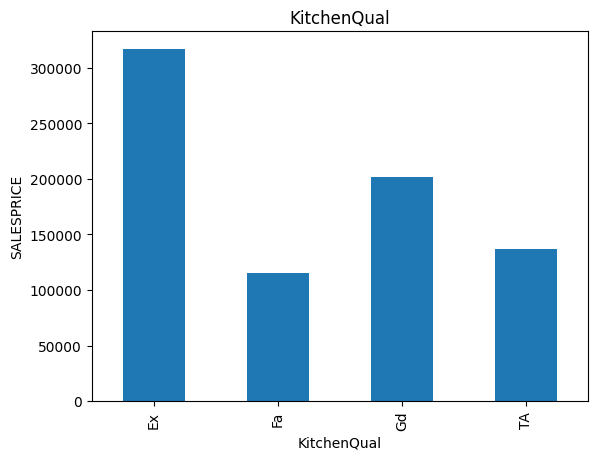

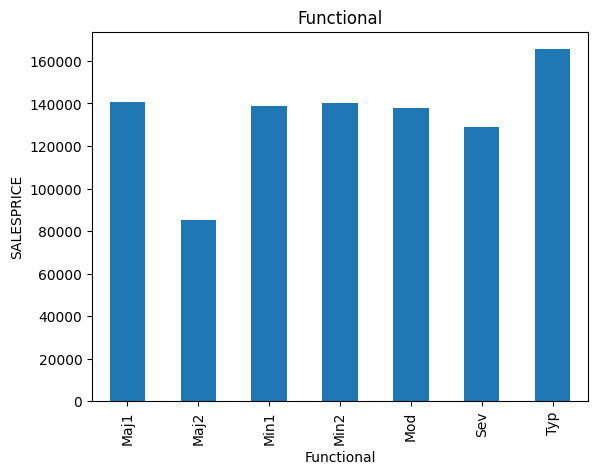

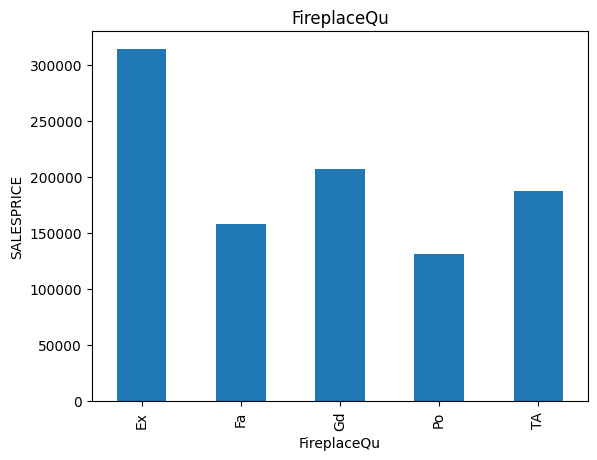

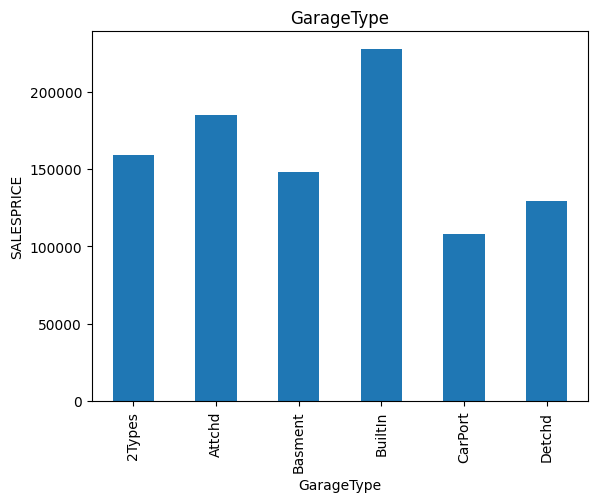

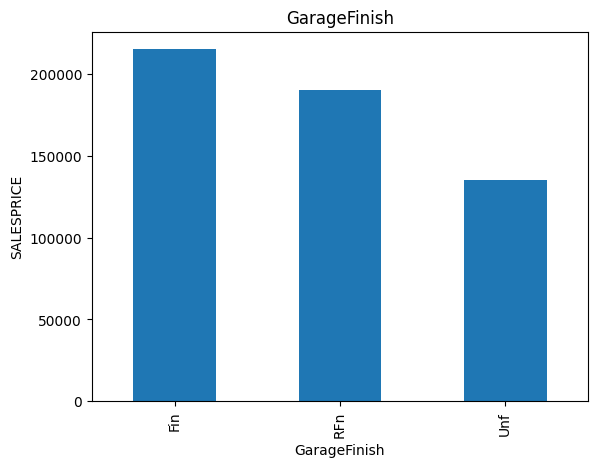

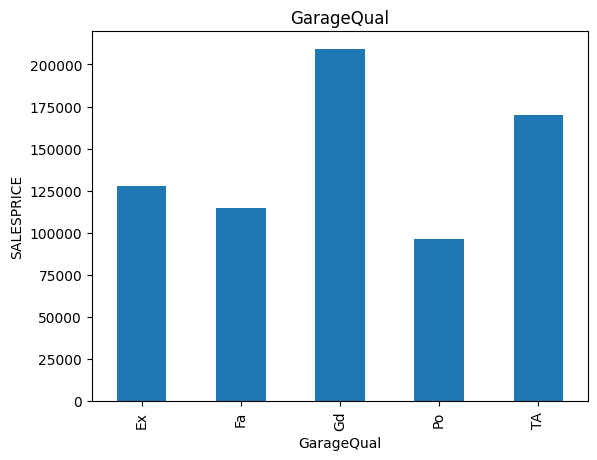

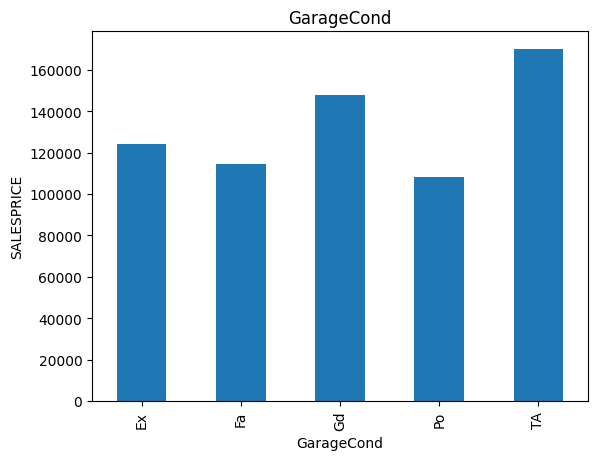

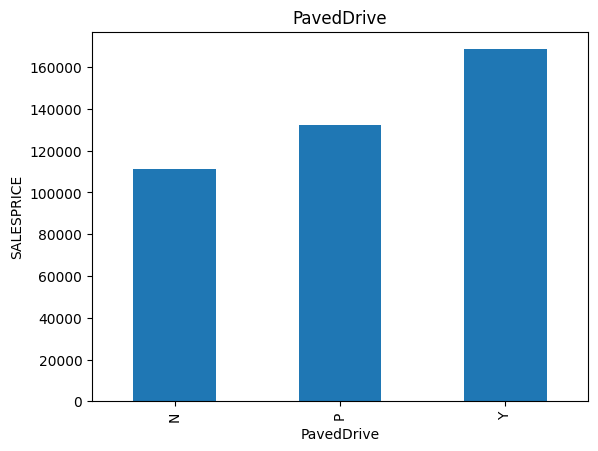

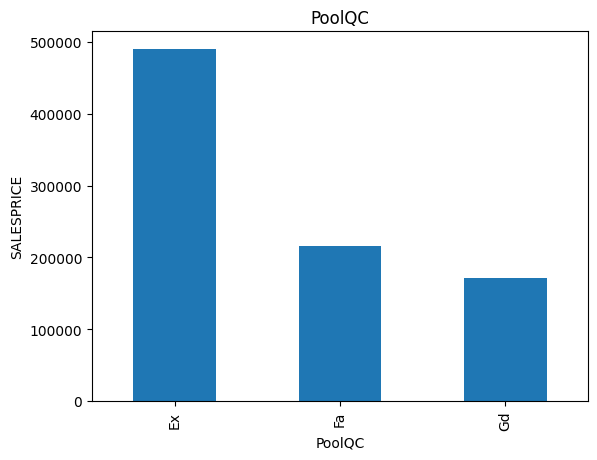

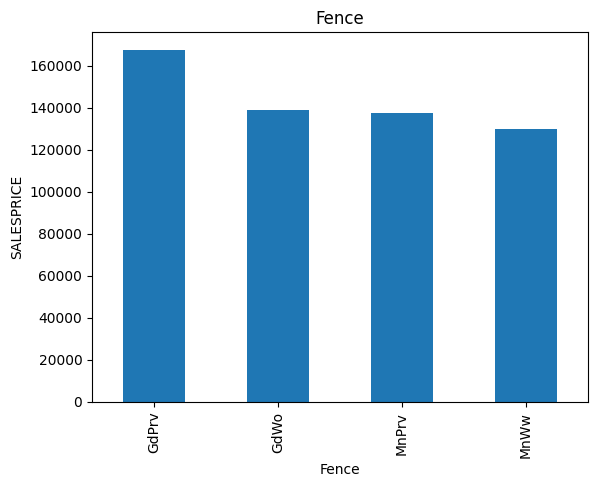

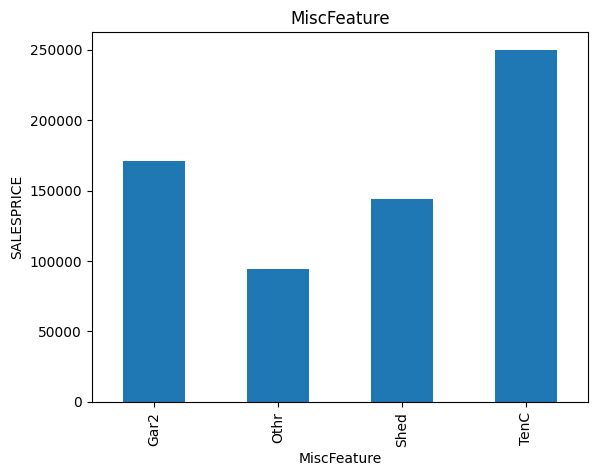

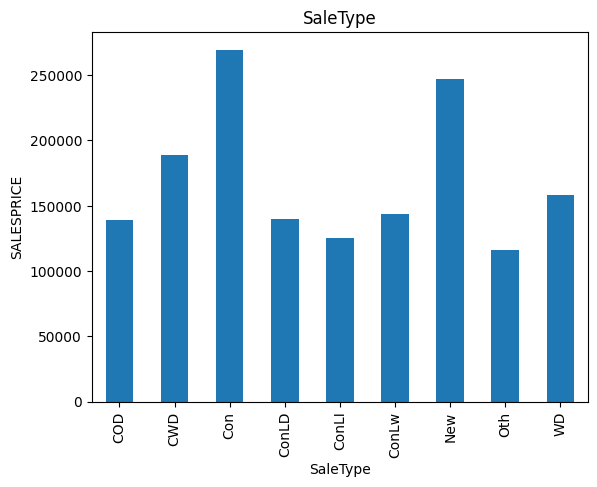

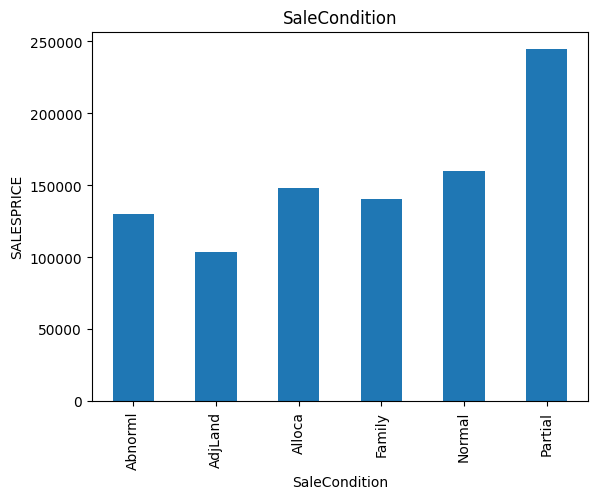


IN MSZONING, FV HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN STREET ,Pave HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN ALLEY, Pave HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN LOTSHAPE, IR2 HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN LANDCONTOUR, HLS HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN UTILITIES, AllPUB HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN LOTCONFIG, CulDSac HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN LANDSLOPE, Mod HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN NEIGHBOURHOOD,NridgHt FV HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN CONDITION1,PosA HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN CONDITION2,PosA HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN BLDGTYPE,TwnhsE HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN HouseStyle,2.5Fin HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN ROOFSTYLE,Shed HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN ROOFMAT1l,WdShngl HAS THE HIGHEST EFFECT ON THE SALES PRICE

IN EXTERIOR1ST,ImStrucc HAS THE HIGHEST EFFECT ON THE SALES PRIC

In [ ]:
#Now we find the relationship between categorical variable and dependent features
d3=data.copy()
for i in cat:
  data.groupby(i)['SalePrice'].median().plot.bar()
  plt.xlabel(i)
  plt.ylabel("SALESPRICE")
  plt.title(i)
  plt.show()

#USING THIS BAR GRAPH WE CAN FIND WHICH VALUE HAS MORE EFFECT ON THE SALES PRICE SO TO FIND THAT WHICH EVER BAR HAS THE HIGHEST VALUE, THATS' THE ONE
print("\nIN MSZONING, FV HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN STREET ,Pave HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN ALLEY, Pave HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN LOTSHAPE, IR2 HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN LANDCONTOUR, HLS HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN UTILITIES, AllPUB HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN LOTCONFIG, CulDSac HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN LANDSLOPE, Mod HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN NEIGHBOURHOOD,NridgHt FV HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN CONDITION1,PosA HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN CONDITION2,PosA HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BLDGTYPE,TwnhsE HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN HouseStyle,2.5Fin HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN ROOFSTYLE,Shed HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN ROOFMAT1l,WdShngl HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN EXTERIOR1ST,ImStrucc HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN EXTERIOR2ND,Other HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN MASVNRTYPE,Stone HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN EXTERQUAL,Ex HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN EXTERCOND,TA HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN FOUNDATION,PConc HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BSMTQUAL,Ex HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BSMTCOND,Gd HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BSMTEXPOSURE,Gd HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BSMTFINTYPE1,GLQ HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN BSMTFINTYPE2,GLQ HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN HEATING,GasA HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN HEATINGQC,EX HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN CENTRALAIR,Y HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN ELECTRICAL,SBrkr HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN KITCHENQUAL,Ex HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN FUNCTIONAL,Typ HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN FIREPLACEQU,Ex HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN GARAGETYPE,Builtin HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN GARAGEFINISH,Fin HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN GARAGEQUAL,Gd HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN GARAGECOND,TA HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN PAVEDDRIVE,Y HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN POOLQC,Ex HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN FENCE,GdPrv HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN MISCFEATURE,TenC HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN SALETYPE,Con HAS THE HIGHEST EFFECT ON THE SALES PRICE")
print("\nIN SALECONDITION,Partial HAS THE HIGHEST EFFECT ON THE SALES PRICE")

In [ ]:
#ALWAYS THE CHANCES OF HAVING DATE LEAKAGE IS HIGH SO TO WE SPLIT THE DATA TO MAKE IT MORE EASIER TO WORK ON.DATA LEAKAGE IS MORE PROMINENT ON LARGE DATASETS
#HERE WILL NOT DO DATA SPLITTING BECAUSE THE DATA IS NOT THAT BIG BUT IN REAL WORLD DATA ANAYSIS WE SHLD DO


#HANDLING MISSING VALUES
#FOR CATEGORICAL DATA

ft=[i for i in data.columns if data[i].isnull().sum()>1 and data[i].dtypes=="O"]

#FINDING THE PERCENTAGE OF MISSING VALUES
for i in ft:
    print(i,np.round(data[i].isnull().mean(),4),'% missing values')

#RN WE ARE ASSIGNING ALL MISSING VALUES A VALUE CALLED MISSING
for i in ft:
    data[i]=data[i].fillna("Missing")
print("\nAfter filling missing values:")
cn=0
for i in ft:
  cn=data[i].isnull().sum().sum()

print("Number of misisng values:- ",cn)

Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values

After filling missing values:
Number of misisng values:-  0


In [ ]:
#HANDLING MISSING VALUES IN NUMERICAL DATA

mssnum, numwn = [], []

#numerical columns with missing values
nanum = [i for i in num if data[i].isnull().sum() > 0]
for i in nanum:
    if data[i].isnull().any():
        mssnum.append(i)
    print(f"{i}: {np.round(data[i].isnull().mean() * 100, 2)}% missing values")

#numerical columns without missing values
for i in num:
    if i not in mssnum:
        numwn.append(i)

#filling missing values using Linear Regression
for i in nanum:
    dtn = data[data[i].isnull()]
    dtwn = data[data[i].notnull()]

    x = dtwn[numwn]
    y = dtwn[i]

    x = x.dropna()
    y = y.loc[x.index]

    if len(x) > 0:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        lr = LinearRegression()
        lr.fit(X_train, y_train)


        x_missing = dtn[numwn]
        x_missing = x_missing.dropna()
        preds = lr.predict(x_missing)

        data.loc[x_missing.index, i] = preds

print("\nAfter filling missing values:")
for i in nanum:
    print(f"{i}: {data[i].isnull().sum()} missing values remaining")

LotFrontage: 17.74% missing values
MasVnrArea: 0.55% missing values
GarageYrBlt: 5.55% missing values

After filling missing values:
LotFrontage: 0 missing values remaining
MasVnrArea: 0 missing values remaining
GarageYrBlt: 0 missing values remaining


In [ ]:
#HANDLING MISSING VALUES IN TEMPORAL VARIABLES

#tmp is the variable which has the temporal variables

#AS WE OBSERVED EARLIER THAT THE YEARSOLD WHEN COMPARED WITH SALES PRICE WAS SHOWING AN UNUSUAL TREND THAT IS IT WAS DECLINING SO TO RESOLVE THIS WE FIND THE NUMBER OF YEARS
#TO DO THAT WE SUBTRACT THE YEARSBUILT WITH YEARSSOLD
for i in tmp:
    data[i]=data['YrSold']-data[i]



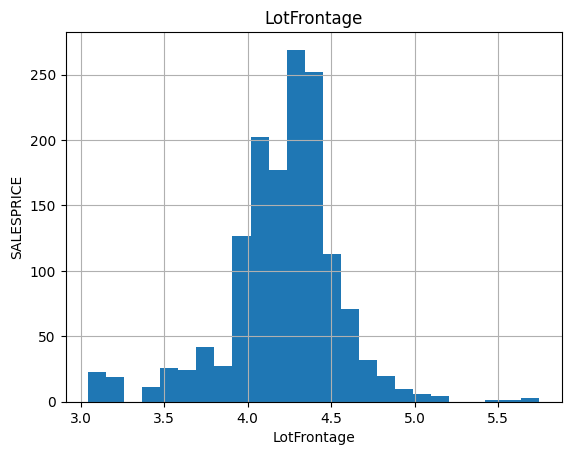

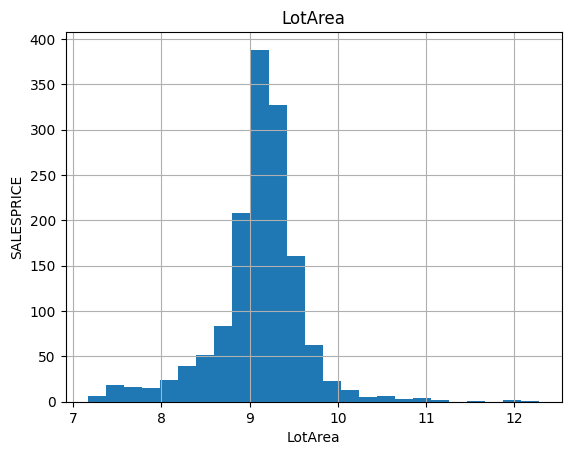

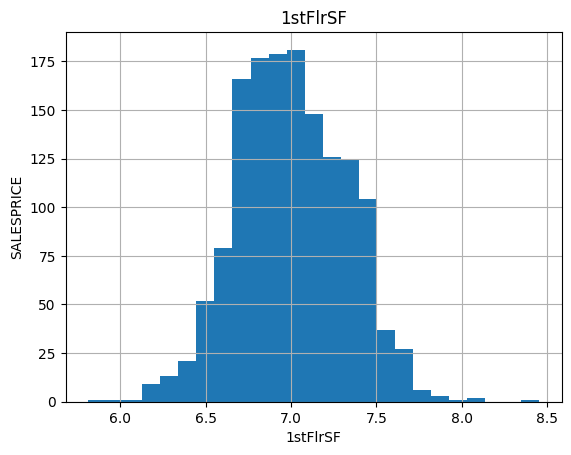

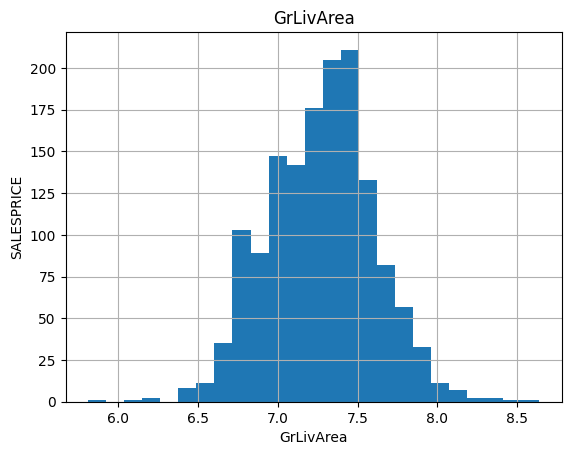

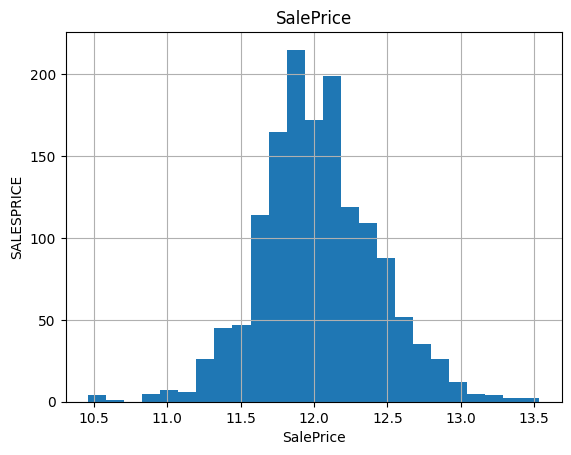

INFERENCE:- As u can now see that the graphs have a normal distribution


In [ ]:
#CONVERTING SKEWED DISTRIBUTIONS INTO NORMAL DISTRIBUTIONS

#AS WE OBSERVED LOTFRONTAGE,LOTAREA,1STFLRSF,GIVLIVAREA AND SALESPRICE HAVE A SKEWED DISTRIBUTION, WE FOUND THIS OUT BY THE GRAPHS ABOVE
#TO CONVERT INTO NORMAL DISTRIBUTION WE USE LOG LIKLIHOOD

tmp=["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]

for i in tmp:
  data[i]=np.log(data[i])

#PLOTTING NORMAL DISTRIBUTION GRAPHS
for i in tmp:
  data[i].hist(bins=25)
  plt.xlabel(i)
  plt.ylabel("SALESPRICE")
  plt.title(i)
  plt.show()

print("INFERENCE:- As u can now see that the graphs have a normal distribution")

In [ ]:
#HANDLING RARE CATEGORICAL FEATURES
#RARE CATEGORICAL FEATRUES ARE THOSE VALUES IN CATEGORICAL FIELD WHOSE VALUES OCCUR LESS THAN 1% OF THE TOTAL OBSERVATIONS
#WE SKIP THESE KIND OF DATAS AND NOW HERE WE R GONNA GIVE THEM A NEW LABEL BECUASE THEY DONT AFFECT MUCH


#THE VARIABLE cat has all the categorical features

for i in cat:
    temp=data.groupby(i)['SalePrice'].count()/len(data)  #Here we finding the percentage of each value of the categorical data
    t_df=temp[temp>0.01].index #Here we r checking whether it is less than 1% or not
    data[i]=np.where(data[i].isin(t_df),data[i],'Rare_var') #Replacing those values with text Rare_var

data.head(20)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,0,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,0,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,0,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,0,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,0,WD,Normal,12.429216
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,MnPrv,Shed,700,10,0,WD,Normal,11.870600
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,0,WD,Normal,12.634603
7,8,60,RL,4.384531,9.247829,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Shed,350,11,0,WD,Normal,12.206073
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,0,WD,Abnorml,11.774520
9,10,190,RL,3.912023,8.911934,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,1,0,WD,Normal,11.678440


In [ ]:
#CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES/LABELS TO USE THEM TO TRAIN OUR MODEL
#TO CONVERT THE DATA, WE USE MEAN ENCODING METHOD WHERE EACH CATEGORY IS GIVEN VALUES BASED ON THE HIGEST VALUE OF MEAN OF THE DEPENDENT VARIABLE THAT IS THE SALESPRICE
#SO THE CATEGORY WITH THE HIGHEST VALUE OF MEAN OF SALESPRICE WILL GET 1 AND SO ON


for i in cat:
  lod=data.groupby(i)['SalePrice'].mean().sort_values().index
  lod={k:i for i,k in enumerate(lod,0)}
  data[i]=data[i].map(lod)

In [ ]:
#FEATURE SCALING
#WE R NOT GONNA DO FEATURE SCALING FOR ID AND SALESPRICE AS ID WILL BE NOT USED FOR THE MODEL AND SALESPICE IS THE TARGET VARIABLE
fts=hd[0:len(hd)-1:1]
print(fts)


#WE USE MINMAX SCALAR HERE SINCE WE WANT ALL THE VALUES WITHIN A SPECIFIC RANGE THAT IS 0 TO 1 SO THAT'S Y WE DONT USE STANDARD SCALOR
#FORMULA FOR MINMAX SCALOR IS (NEW)X=( (OLD)X-(MIN)X )/RANGE OF X

mms=MinMaxScaler()
mms.fit(data[fts])
mms.transform(data[fts])

data=pd.concat([data[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(mms.transform(data[fts]),columns=fts)],axis=1)
#IN THE ABOVE LINE WE ADDED THE SCALED DATA TO THE ORGINAL DATSET ALONG WITH ID AND SALESPRICE AS WHEN WE TRANSFORM THE SCALED DATA IT WILL BE AN ARRAY SO WE R CONVERTING IT INTO TO DATASET


data.head(20)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.090909,0.0,0.666667,0.75
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.363636,0.0,0.666667,0.75
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.727273,0.0,0.666667,0.75
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.090909,0.0,0.666667,0.00
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,1.000000,0.0,0.666667,0.75
5,6,11.870600,0.176471,0.75,0.517503,0.466761,1.0,1.0,0.333333,0.333333,...,0.000000,0.0,0.0,0.50,0.5,0.045161,0.818182,0.0,0.666667,0.75
6,7,12.634603,0.000000,0.75,0.471175,0.400943,1.0,1.0,0.000000,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.636364,0.0,0.666667,0.75
7,8,12.206073,0.235294,0.75,0.495991,0.406643,1.0,1.0,0.333333,0.333333,...,0.000000,0.0,0.0,1.00,0.5,0.022581,0.909091,0.0,0.666667,0.75
8,9,11.774520,0.176471,0.25,0.328426,0.303205,1.0,1.0,0.000000,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.272727,0.0,0.666667,0.00
9,10,11.678440,1.000000,0.75,0.321097,0.340903,1.0,1.0,0.000000,0.333333,...,0.000000,0.0,0.0,1.00,1.0,0.000000,0.000000,0.0,0.666667,0.75


R-squared: 0.9097517063752719
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:20:22   Log-Likelihood:                 1066.6
No. Observations:                1460   AIC:                            -1977.
Df Residuals:                    1382   BIC:                            -1565.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

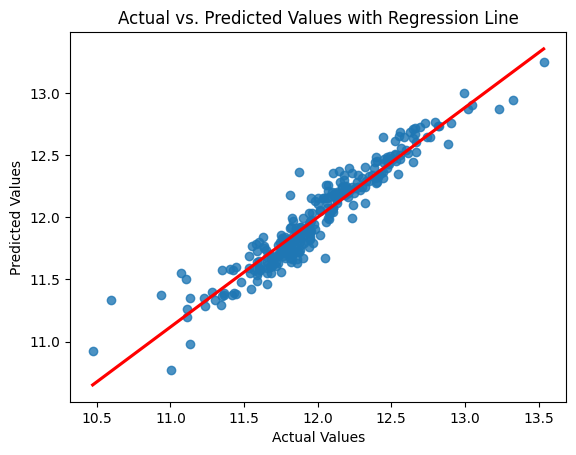

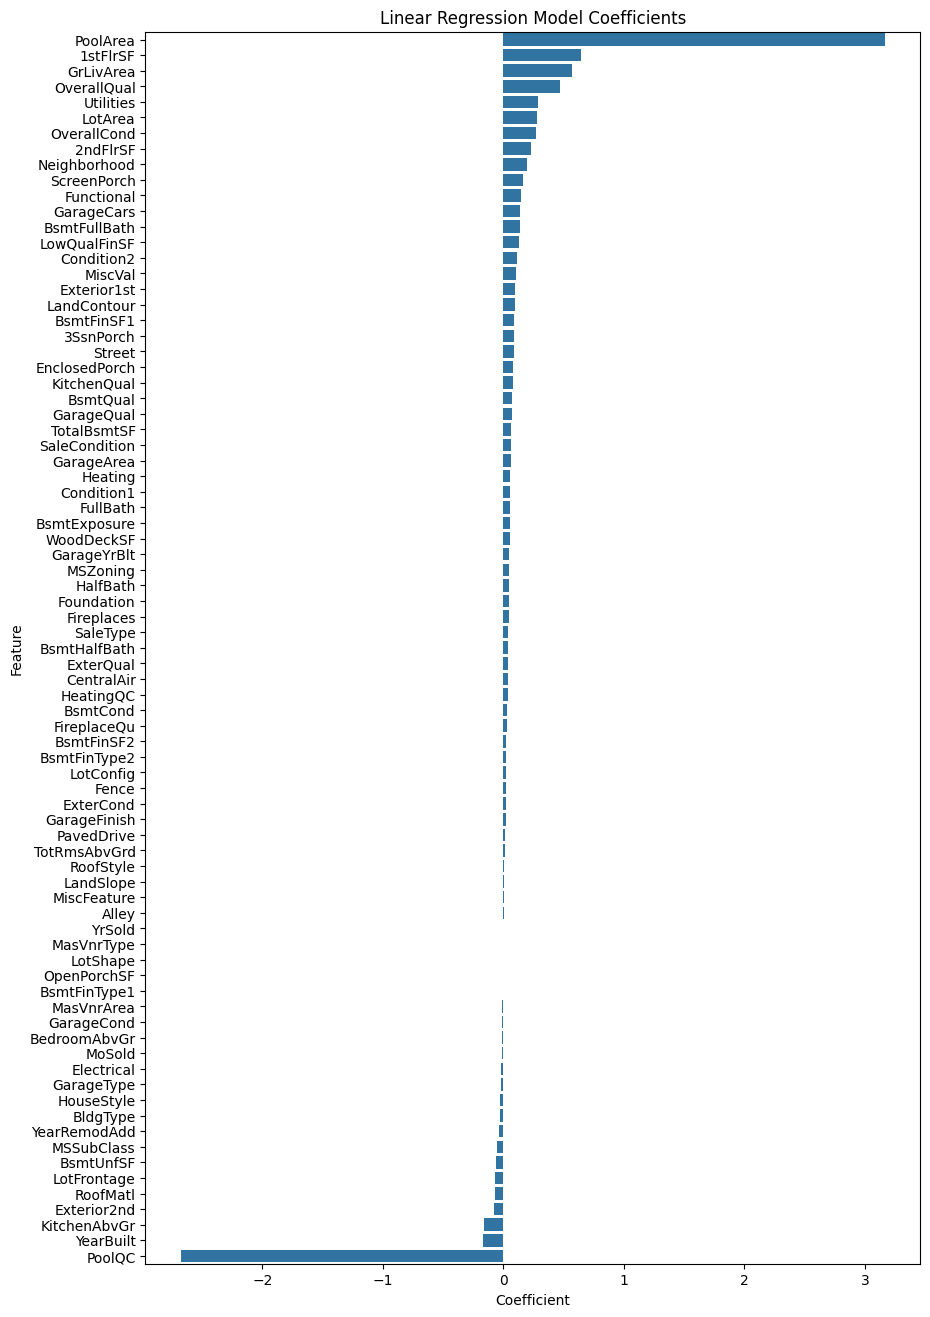

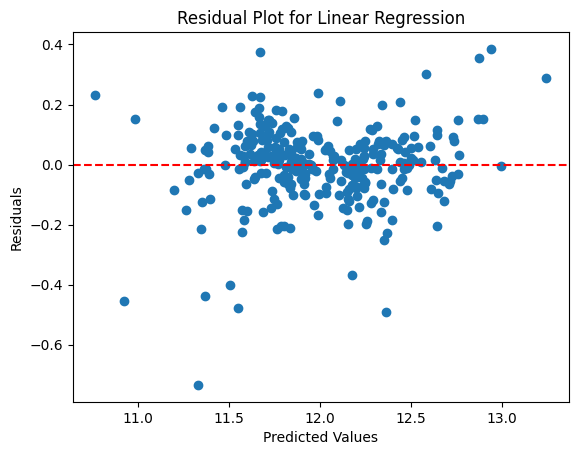

In [ ]:
#DEVOLPING THE MODEL AND TRAINING IT


X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#APPLYING LINEAR REGRESSION MODEL HERE
lr=LinearRegression()
lr.fit(x_train,y_train)


predictions = lr.predict(x_test)

r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)


#WE USE STATSMODEL MODULE TO FIND THE MODEL SUMMARY
X1=sm.add_constant(X)
model = sm.OLS(y, X1).fit()
print(model.summary())


sns.regplot(x=y_test, y=predictions, ci=None, line_kws={'color': 'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Regression Line")
plt.show()

#Visualizing Model Coefficients
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': lr.coef_})
coefficients = coefficients.sort_values(by=['Coefficient'], ascending=False)

plt.figure(figsize=(10, 16))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Linear Regression Model Coefficients")
plt.show()


#Visualizing Residuals
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()